In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
bias = 1.0
thres = 2.1

N_time = 2000
dt = 0.01
time_scale = 1.0

gaussian_norm = 1 / np.sqrt(np.pi)
gauss_points, gauss_weights = np.polynomial.hermite.hermgauss(300)
gauss_points = gauss_points * np.sqrt(2)

def Phi(mu, delta0, bias, thres):
    integrand = bias + np.tanh(mu + np.sqrt(delta0) * gauss_points - thres)
    return gaussian_norm * np.dot(integrand, gauss_weights)

def derPhi(mu, delta0, thres):
    integrand = 1 / (np.cosh(mu + np.sqrt(delta0) * gauss_points - thres) ** 2)
    return gaussian_norm * np.dot(integrand, gauss_weights)

In [ ]:
N_neuron_arr = np.array([25, 25, 25, 25])
sigma = 0.7

N_population = len(N_neuron_arr)
N_neuron = int(np.sum(N_neuron_arr))
N_rank = 2*N_population


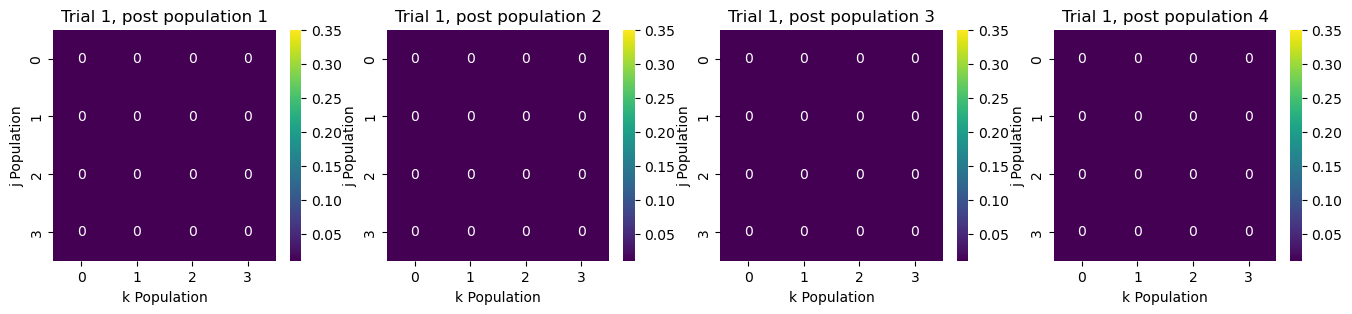

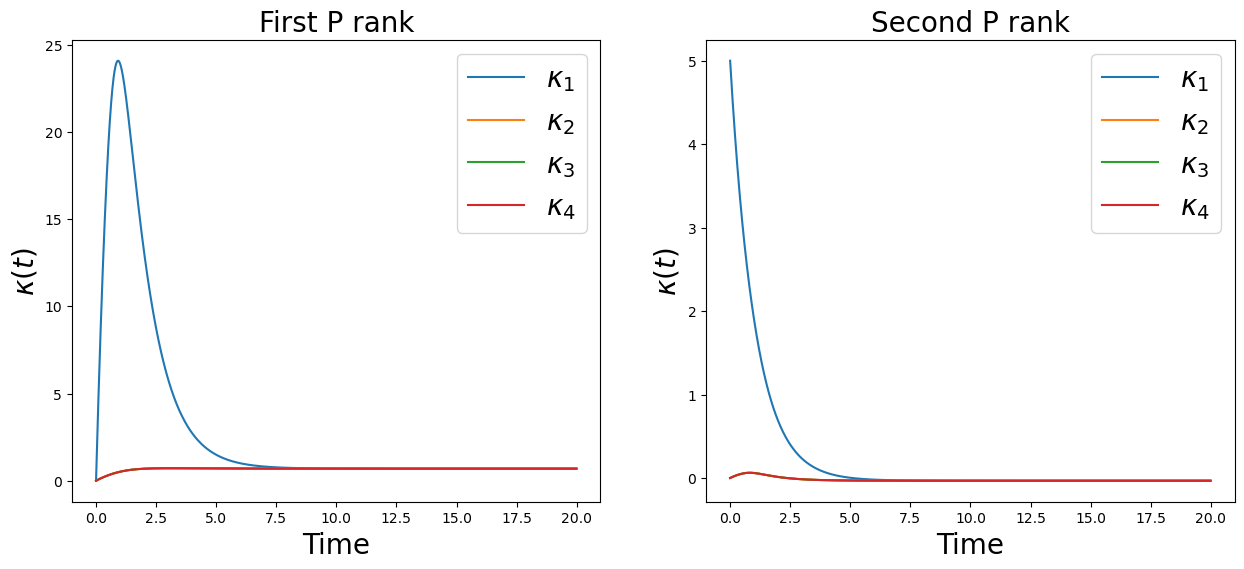

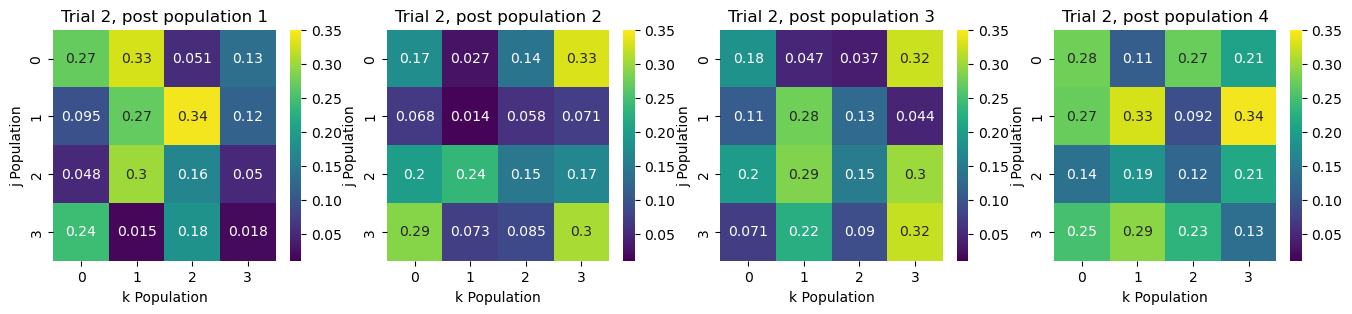

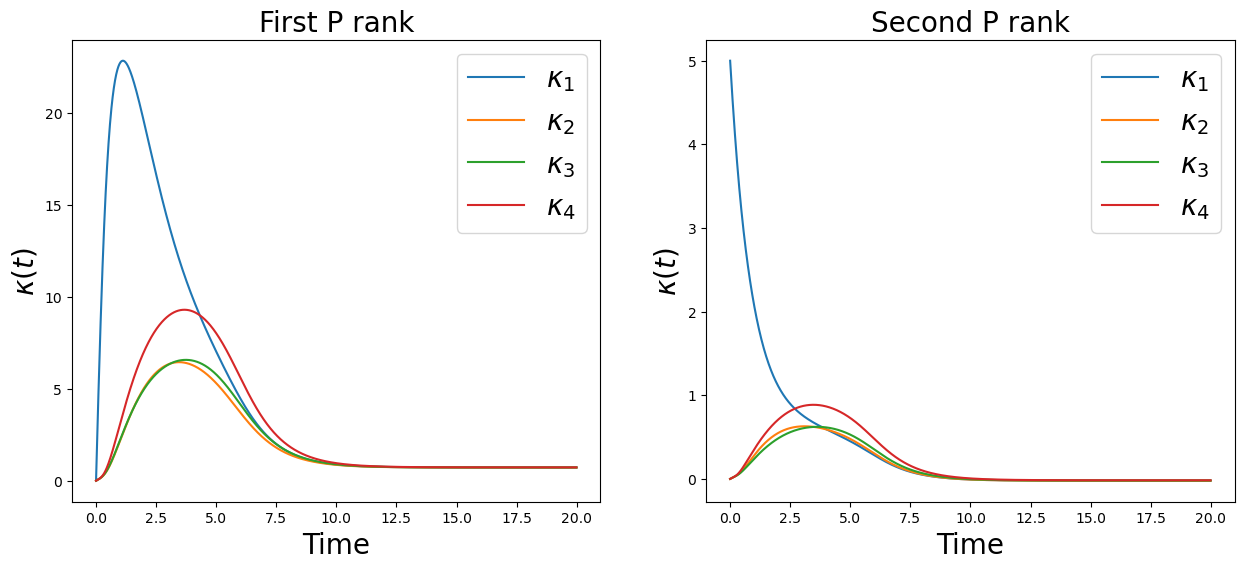

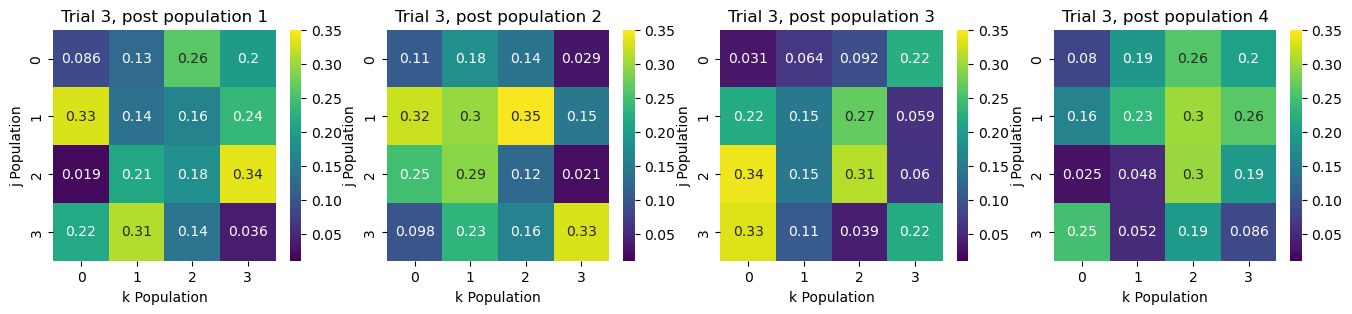

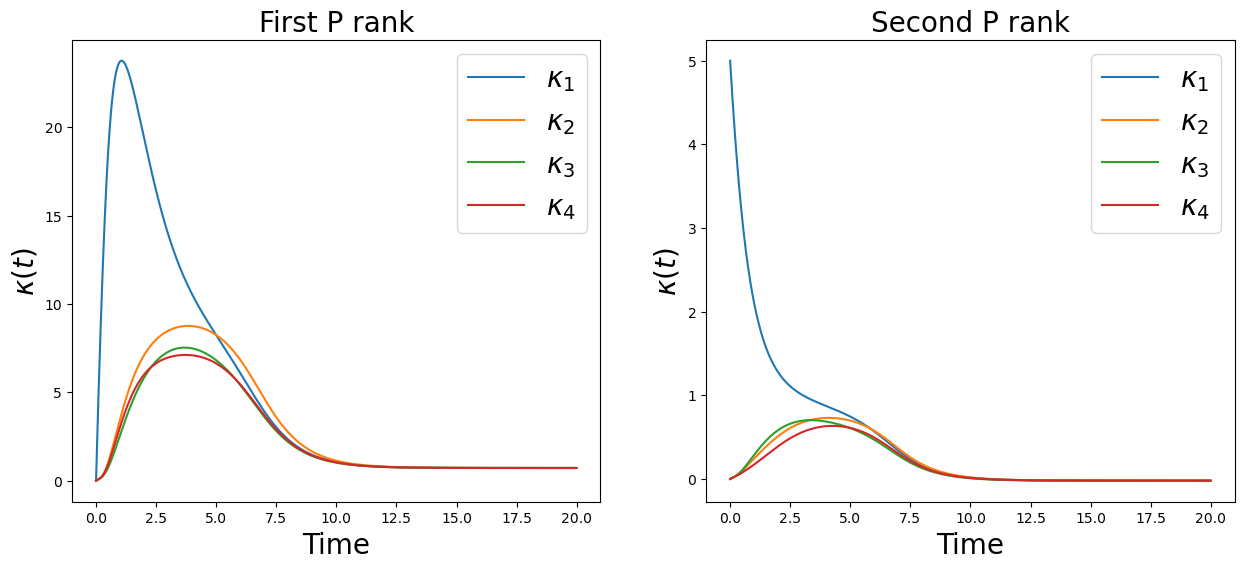

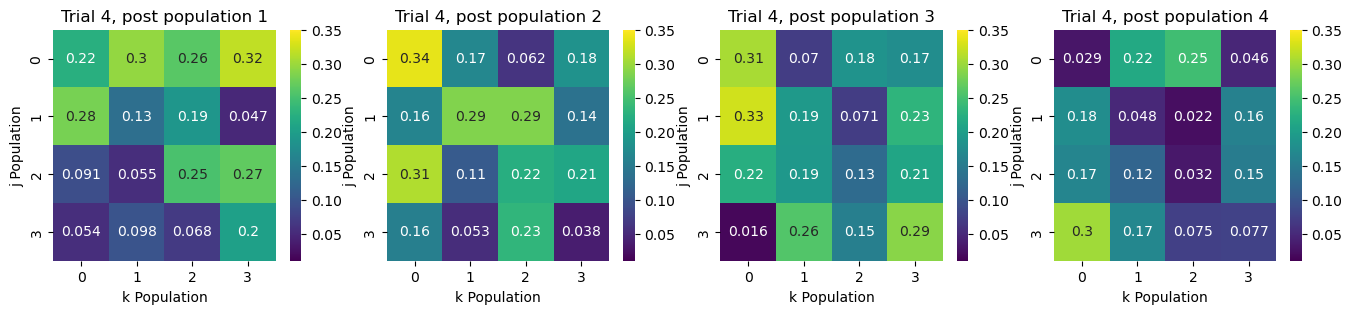

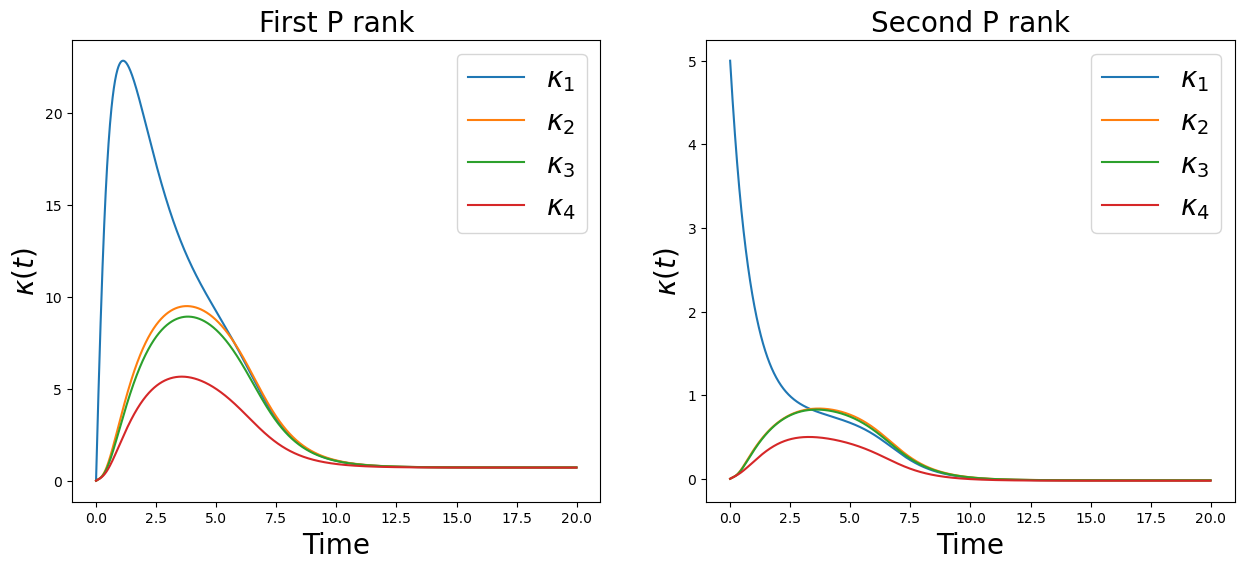

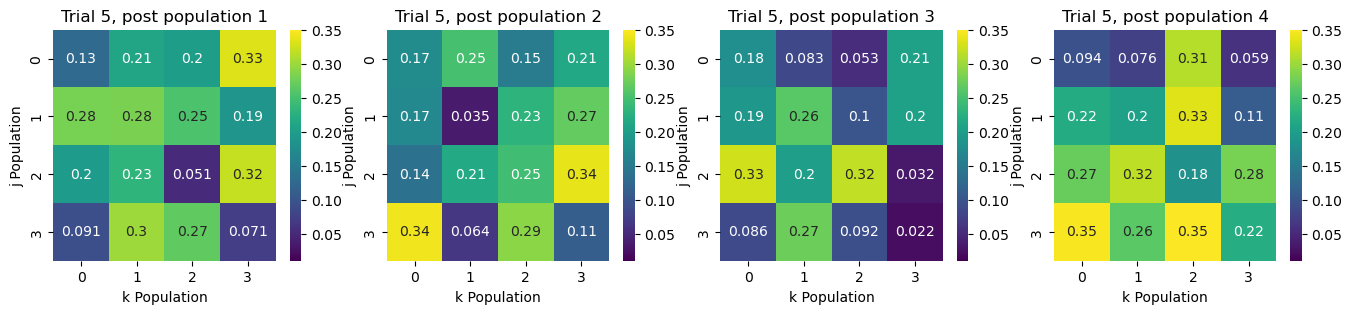

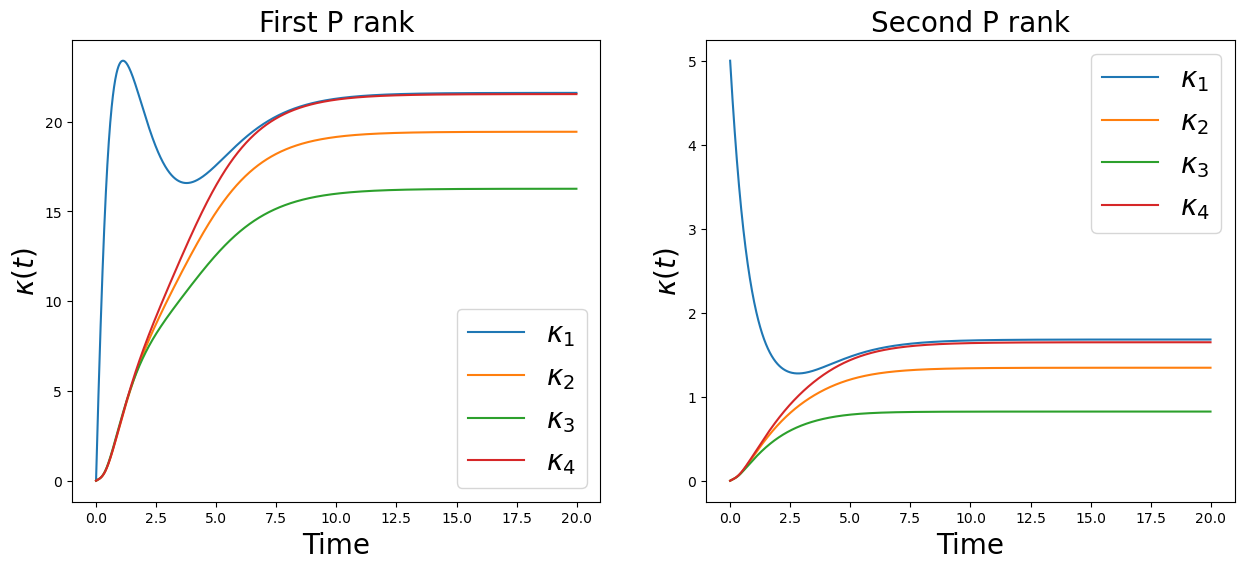

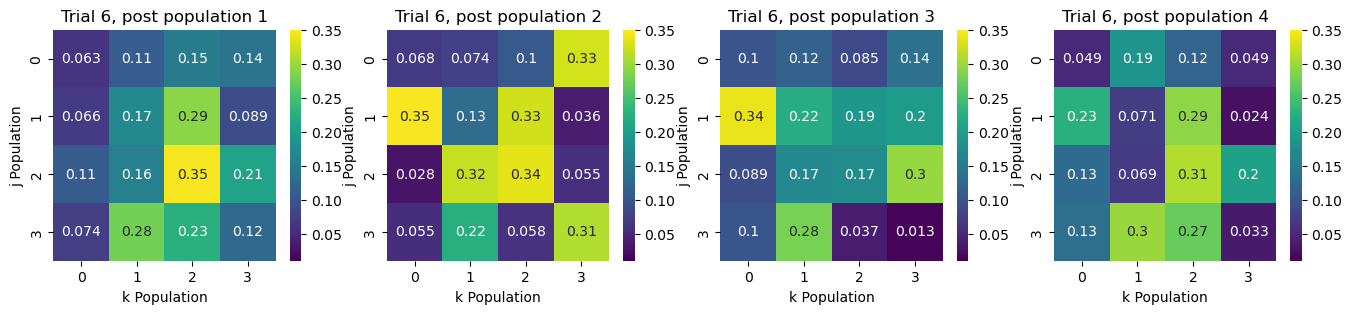

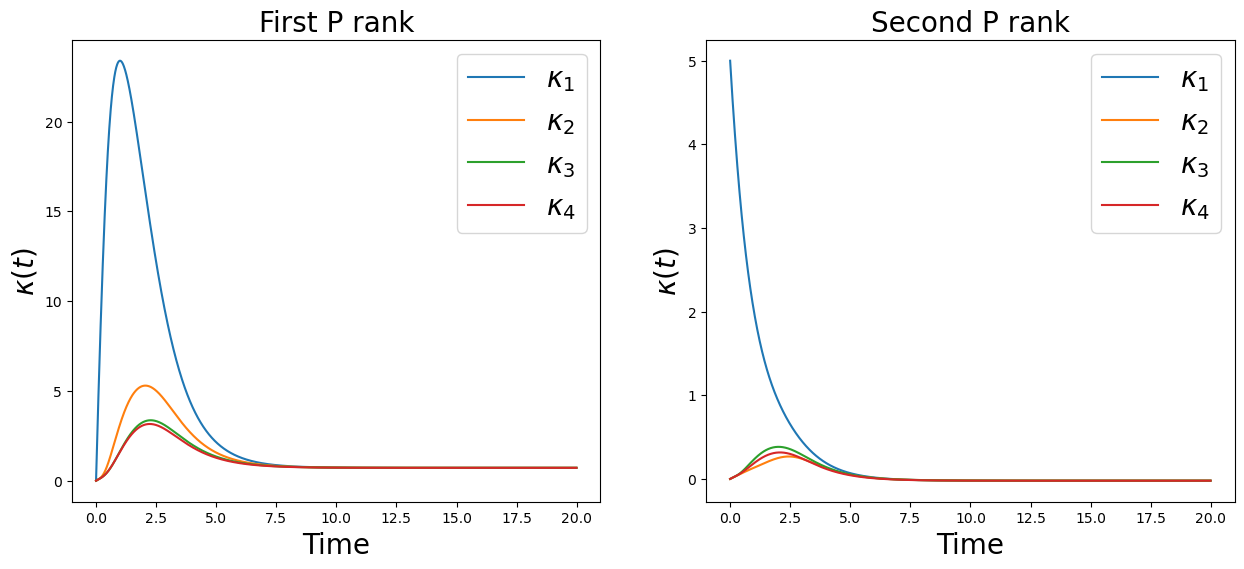

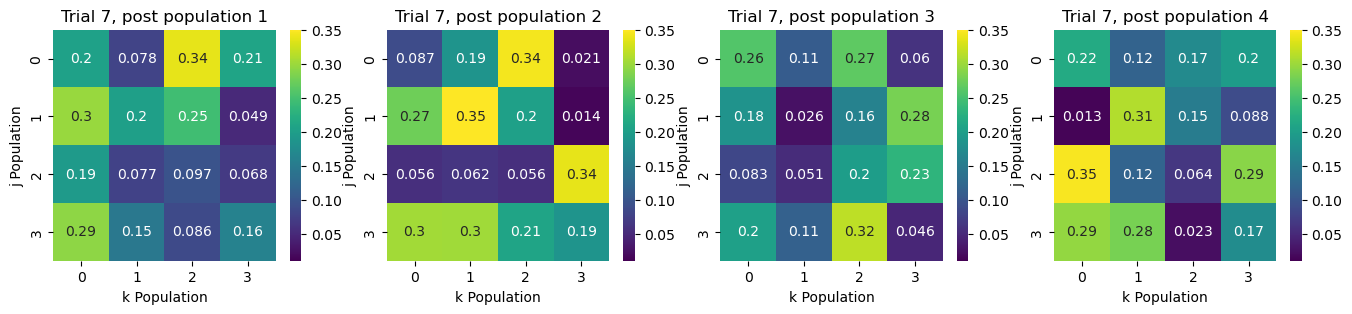

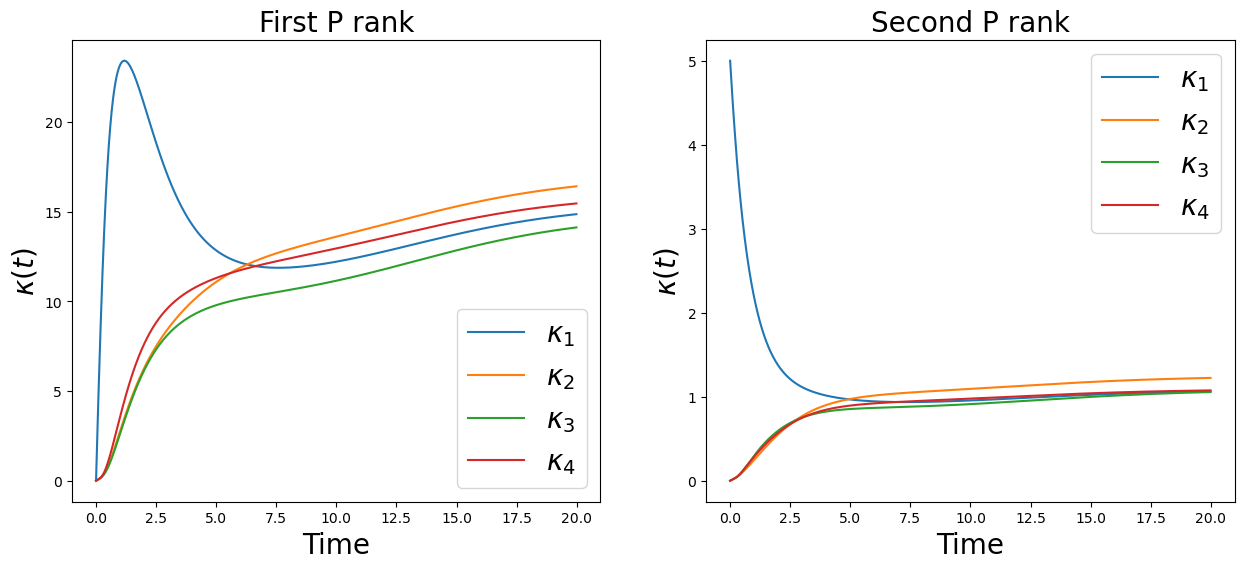

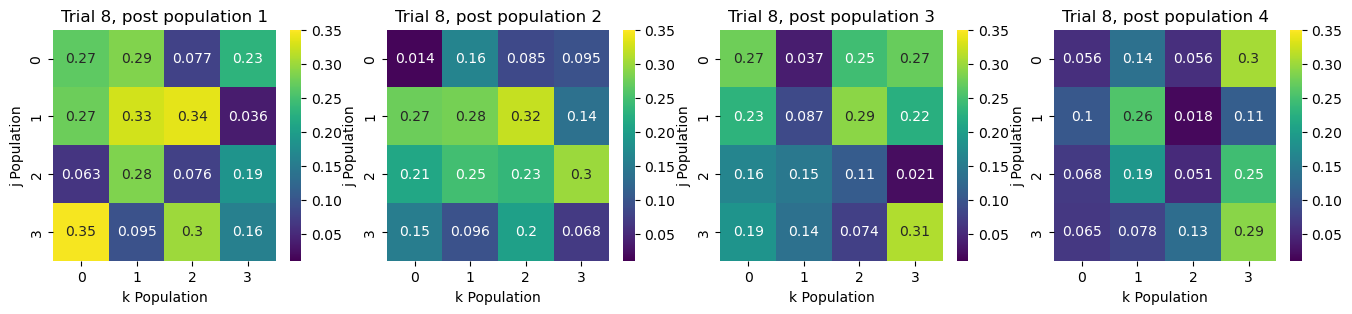

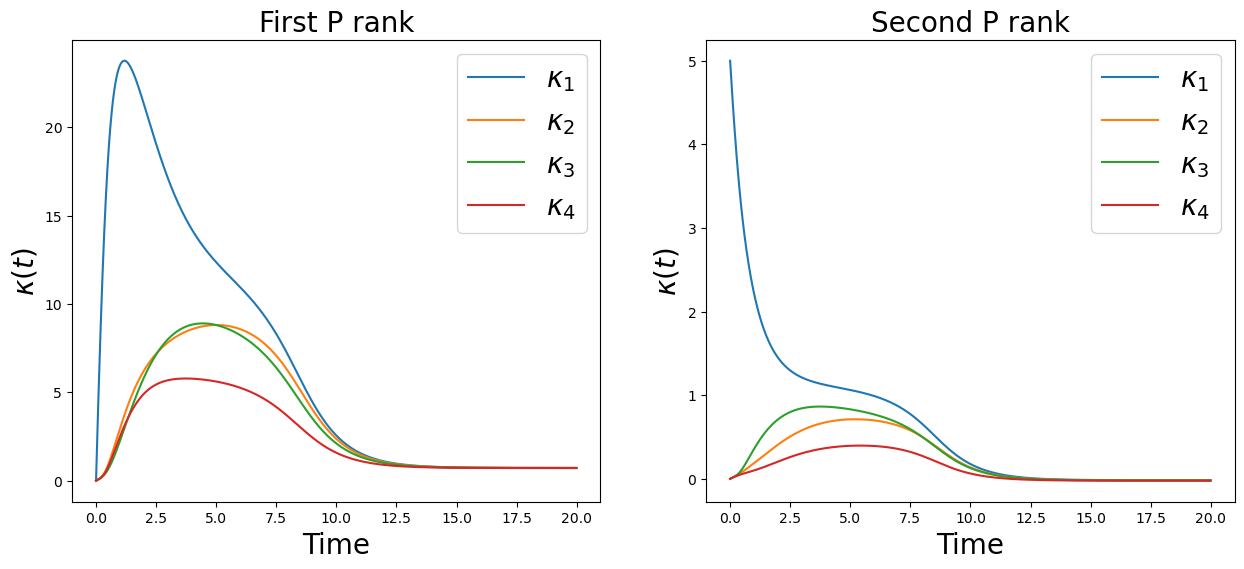

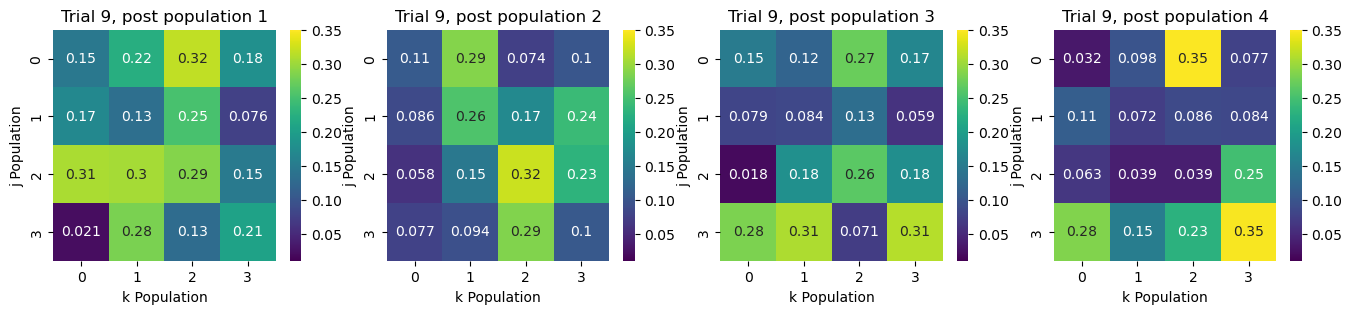

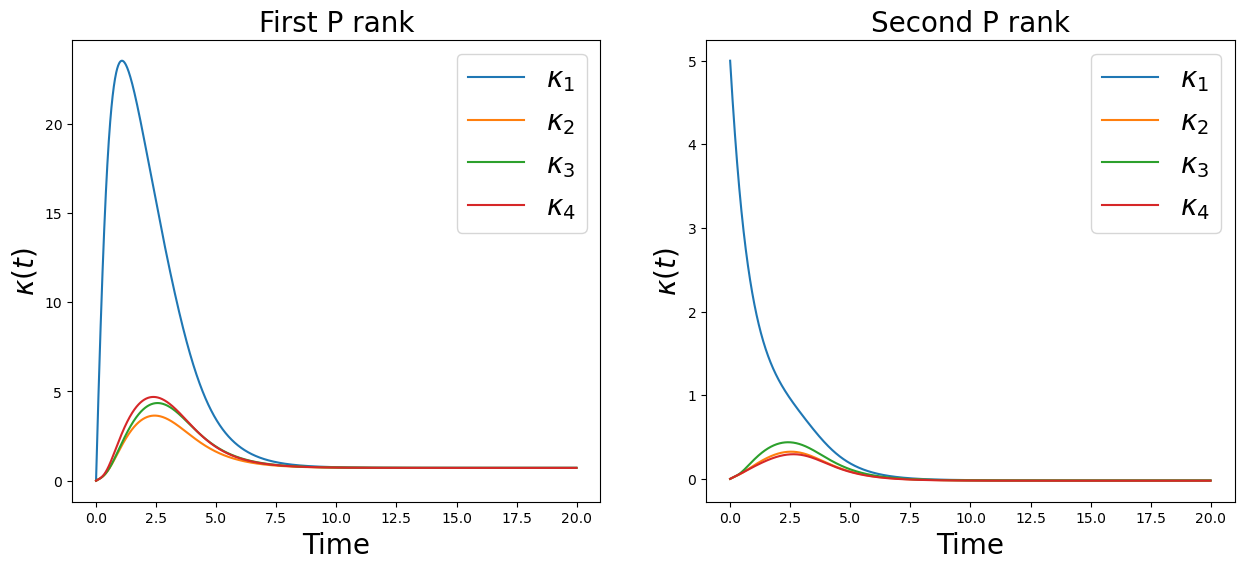

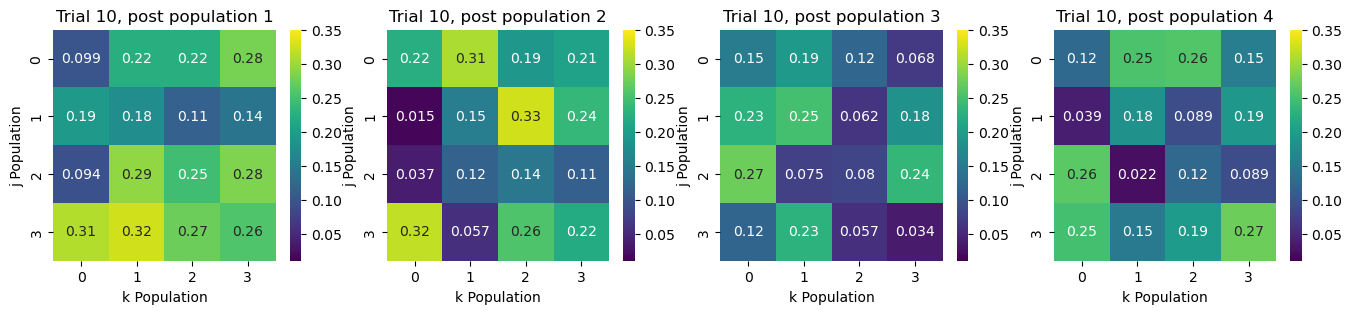

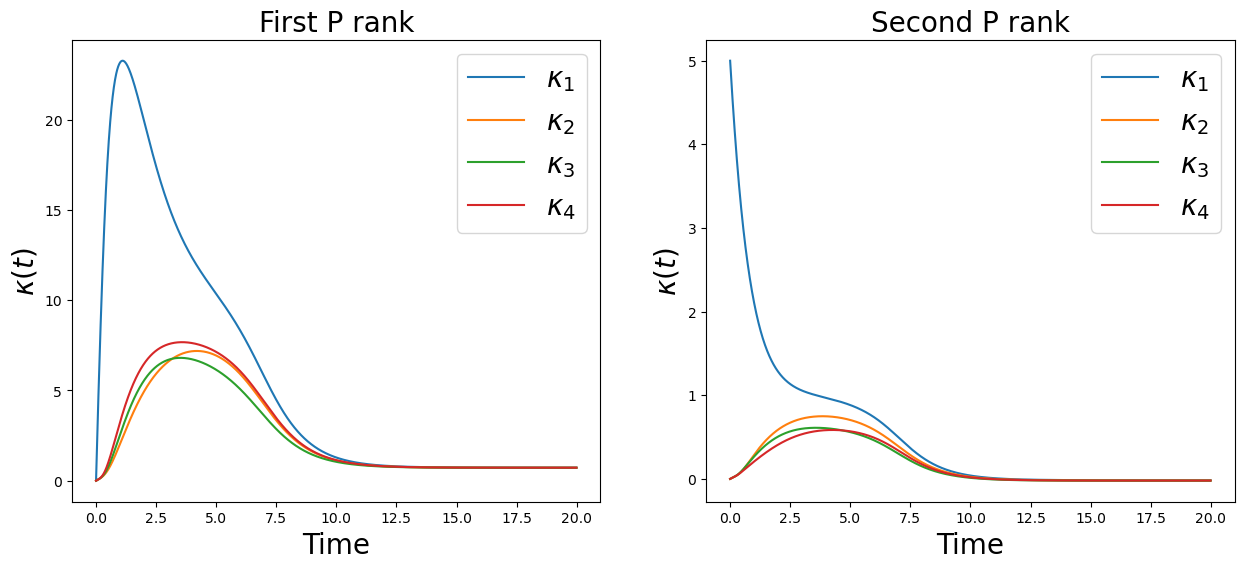

In [ ]:
N_trials = 10

for k_trial in range(N_trials):
    
    plt.figure(figsize=(16.5, 3))
    TauChain = np.zeros((N_population, N_population, N_population))
    TauChain += np.random.uniform(0.01, 0.35, (N_population, N_population, N_population))
    if(k_trial==0):
        TauChain = np.zeros((N_population, N_population, N_population))
    for i in range(N_population):
        plt.subplot(1, N_population, i+1)
        sns.heatmap(TauChain[i, :, :], annot=True, cmap='viridis', vmin=0.01, vmax=0.35)
        plt.title(f'Trial {k_trial+1}, post population {i+1}')
        plt.xlabel('k Population')
        plt.ylabel('j Population')
    plt.show()
        
    SigmaU2 = np.zeros((N_population, N_population))     # population, rank
    for x in range(N_population):
        for k in range(N_population):
            for y in range(N_population):
                SigmaU2[x, k] += (sigma**2/N_neuron) * np.abs(TauChain[y, x, k])
                
    k_res = np.zeros((2*N_population, N_time))
    k_res[N_population, 0] = 5.0    # Initial condition
    
    # generate connectivity
    J_connect = np.zeros((N_neuron, N_neuron))
    vec_u = np.zeros((N_neuron, N_population))
    vec_v = np.zeros((N_neuron, N_population))
    vec_m = np.zeros((N_neuron, N_population))
    vec_n = np.zeros((N_neuron, N_population))
    for i in range(N_population):
        vec_v[np.sum(N_neuron_arr[i]):np.sum(N_neuron_arr[i+1]), i] = np.ones(N_neuron_arr[i])
        vec_m[np.sum(N_neuron_arr[i]):np.sum(N_neuron_arr[i+1]), i] = np.ones(N_neuron_arr[i])
    for r in range(N_population):
        J_connect += np.outer(vec_u[:, r], vec_v[:, r])
        J_connect += np.outer(vec_m[:, r], vec_n[:, r])
    # visualize connectivity
    plt.figure(figsize=(6, 5))
    sns.heatmap(J_connect, cmap='bwr', center=0)
    plt.title(f'Connectivity matrix, trial {k_trial+1}')
    plt.xlabel('Neuron index')
    plt.ylabel('Neuron index')
    plt.show()

    for i_t in range(N_time-1):
    
        for r_uv in range(N_population):    # varianve variables
            delta_p_ruv = np.dot(SigmaU2[r_uv, :], k_res[:N_population, i_t]**2)
            k_res[r_uv, i_t+1] = k_res[r_uv, i_t] + (dt/time_scale) * (- k_res[r_uv, i_t] + N_neuron_arr[r_uv] * Phi(k_res[r_uv+N_population, i_t], delta_p_ruv, bias, thres) )
        
        for r_mn in range(N_population):    # mean variables
            delta_p_rmn = np.dot(SigmaU2[r_mn, :], k_res[:N_population, i_t]**2)
            recurrent_term = 0
            for x in range(N_population):
                recurrent_term += N_neuron_arr[x] * ((sigma**2/N_neuron)*np.dot(TauChain[r_mn, x, :], k_res[:N_population, i_t]) * derPhi(k_res[x+N_population, i_t], delta_p_rmn, thres) + j0_mat[r_mn,x] * Phi(k_res[x+N_population, i_t], delta_p_rmn, bias, thres))
            k_res[r_mn+N_population, i_t+1] = k_res[r_mn+N_population, i_t] + (dt/time_scale) * (- k_res[r_mn+N_population, i_t] + recurrent_term)

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('First P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.subplot(1, 2, 2)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[N_population + i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('Second P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.show()


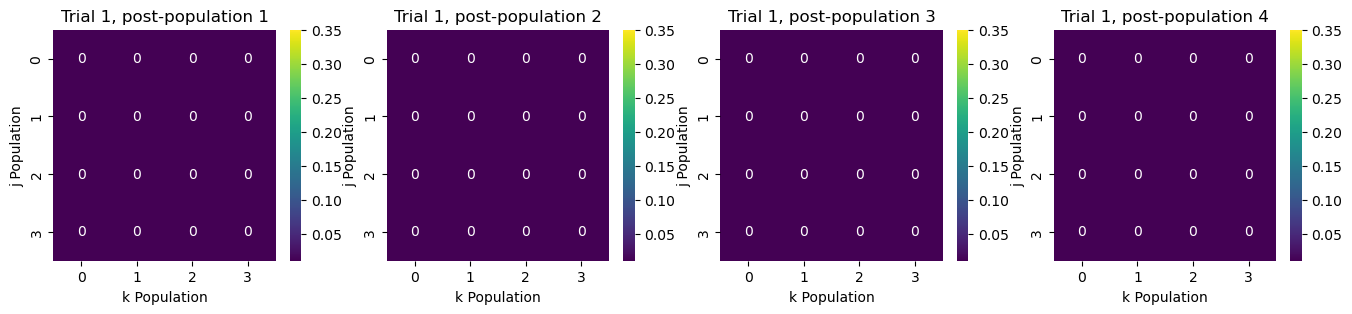

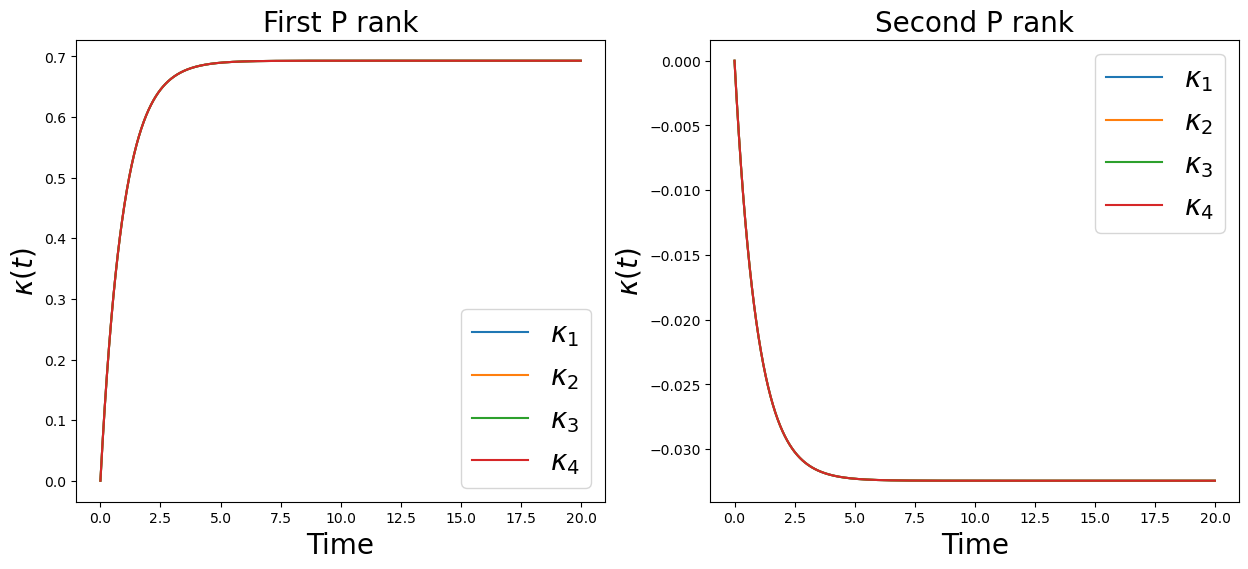

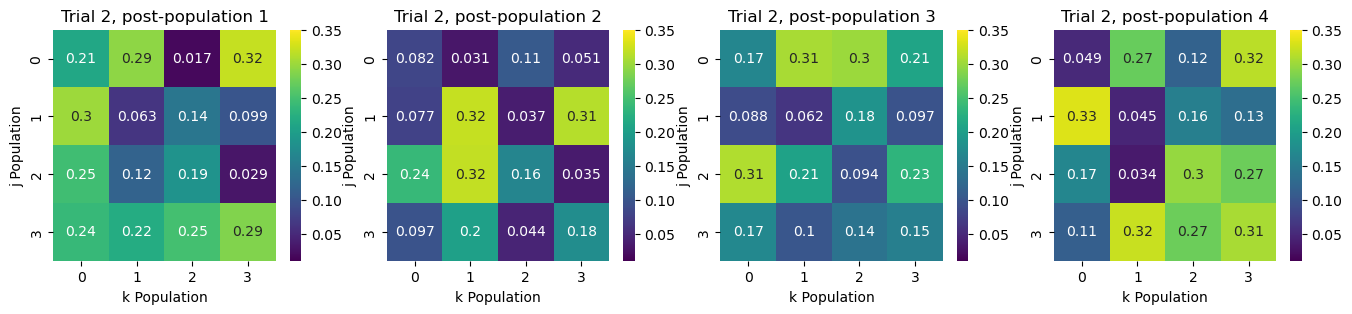

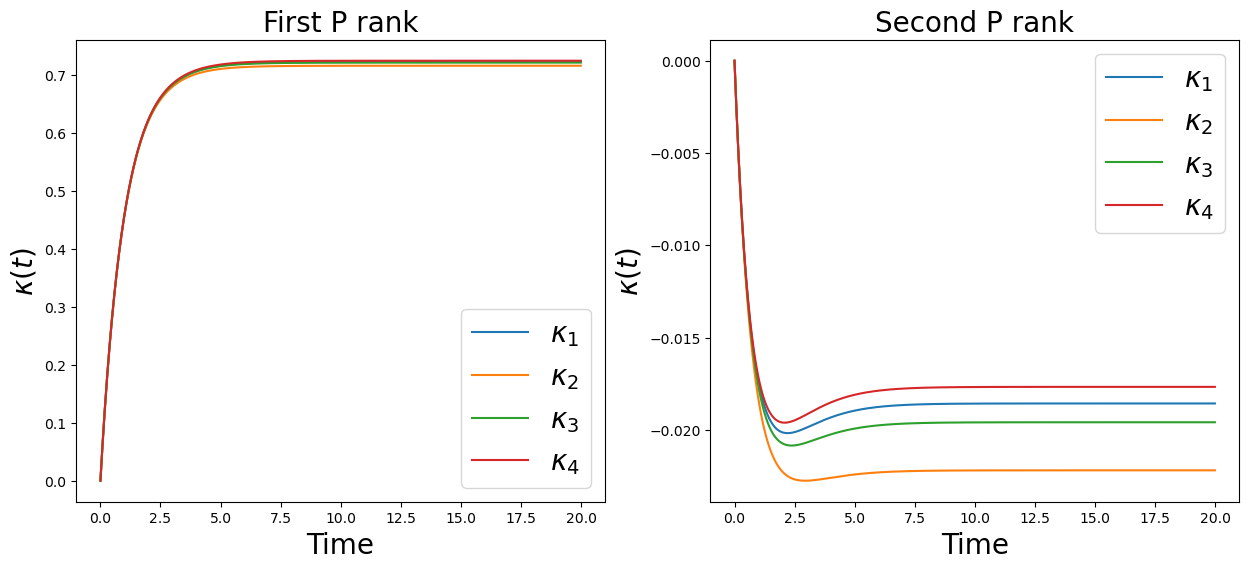

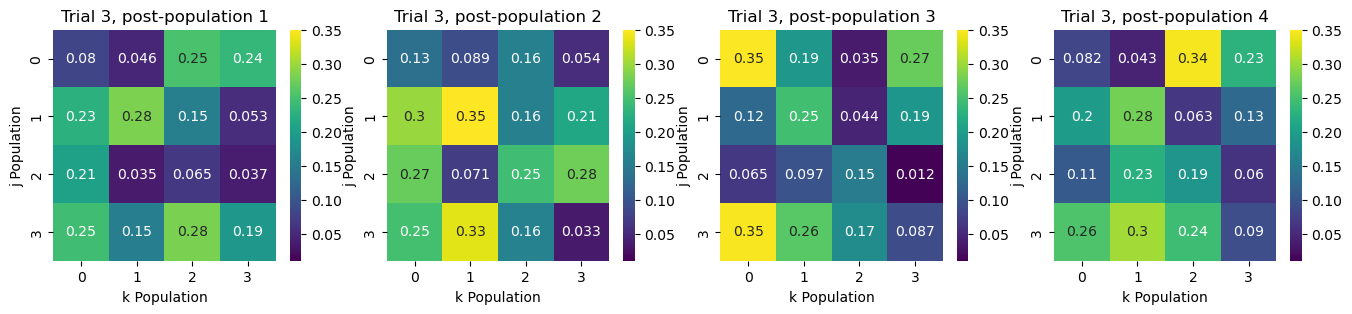

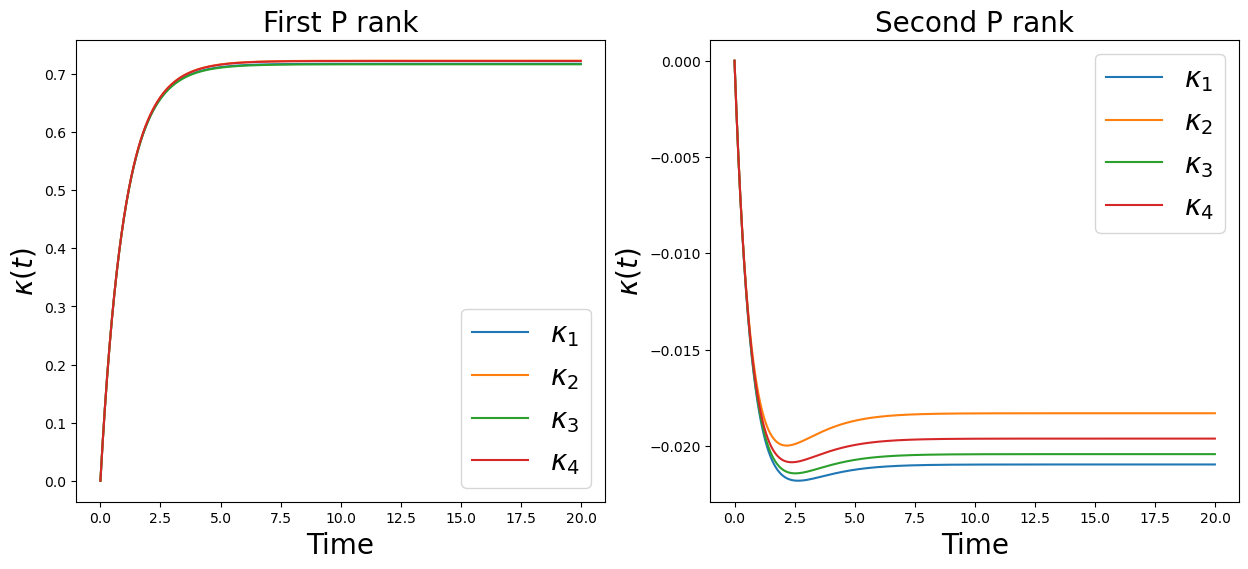

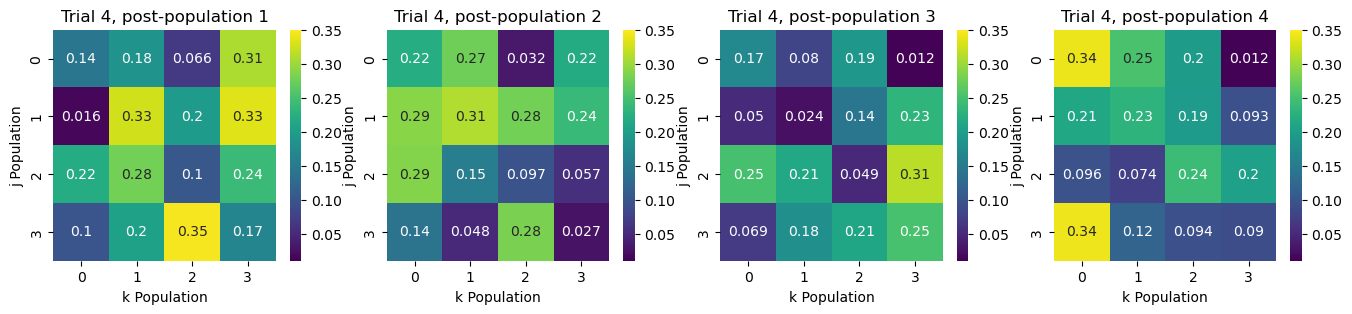

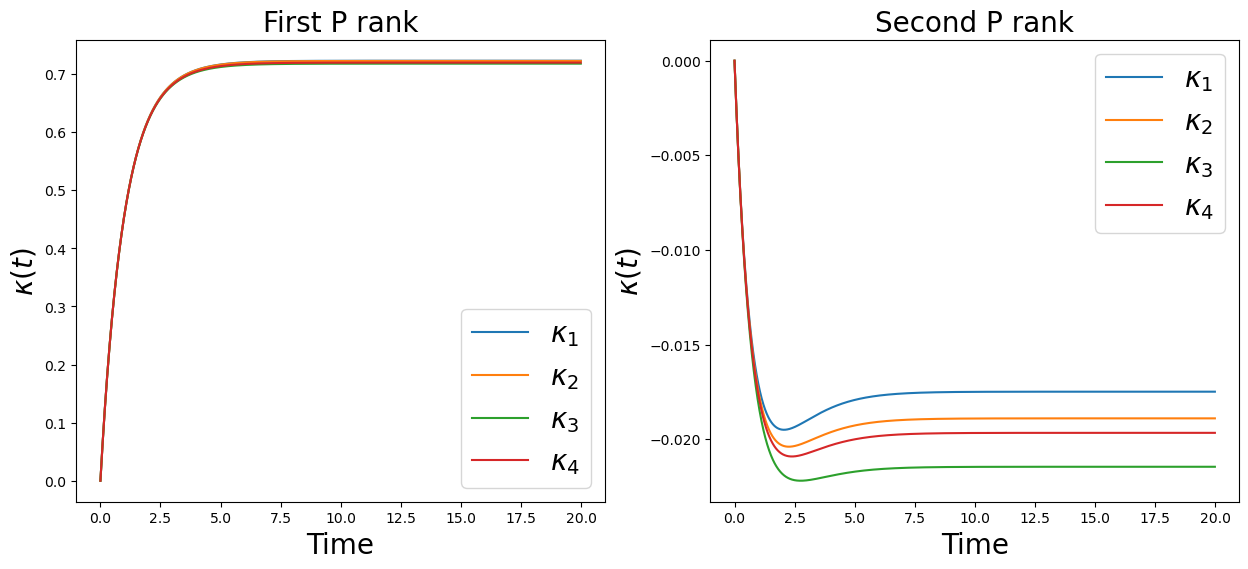

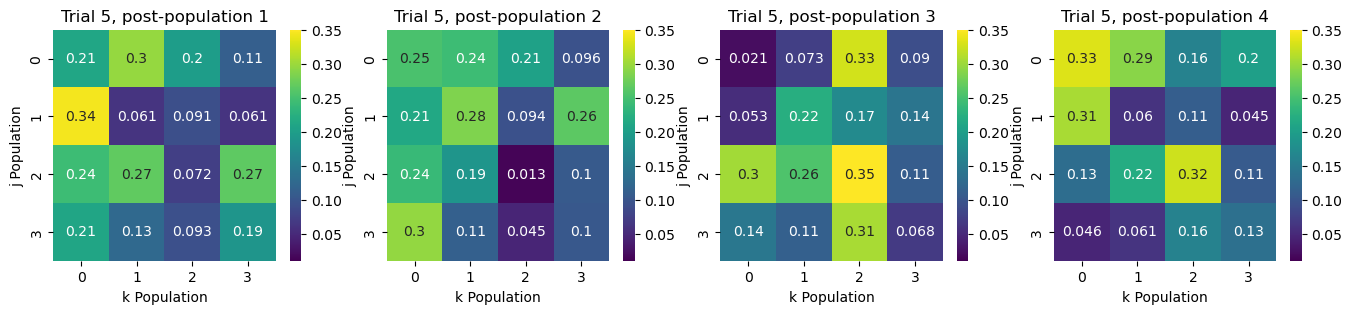

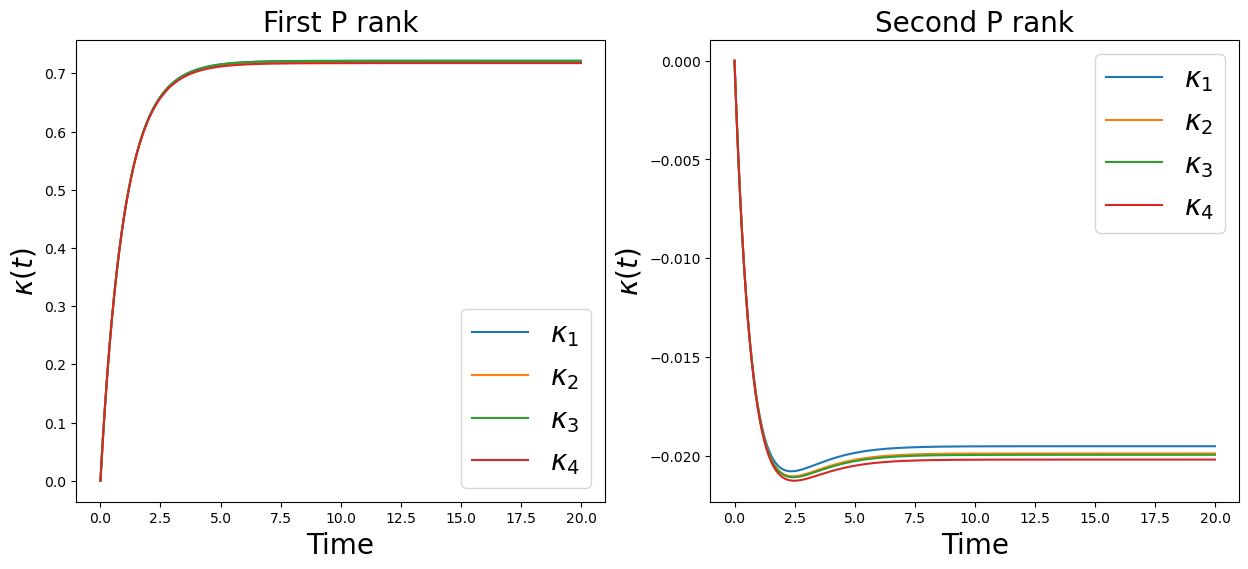

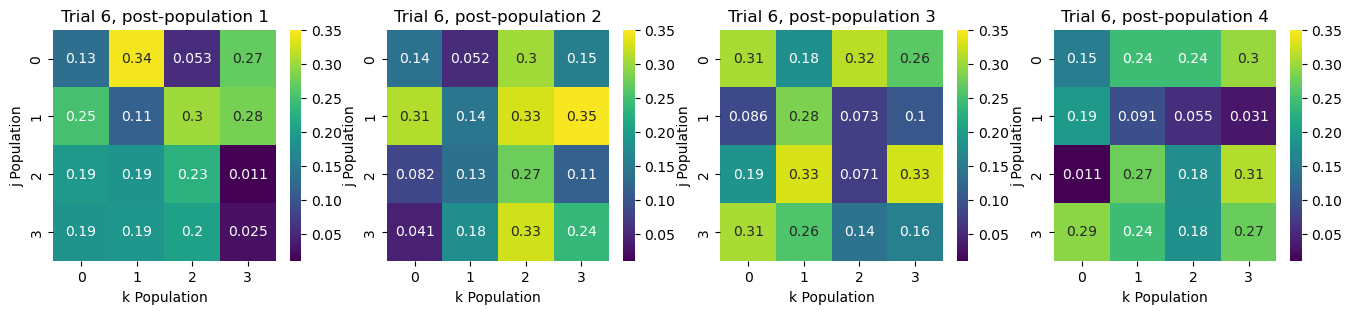

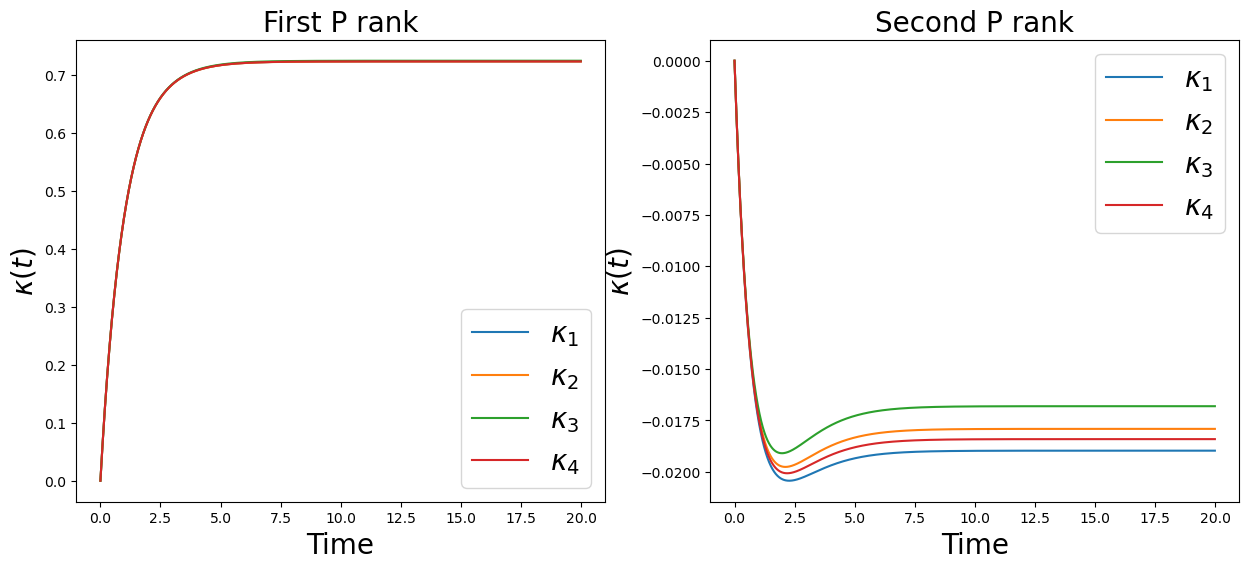

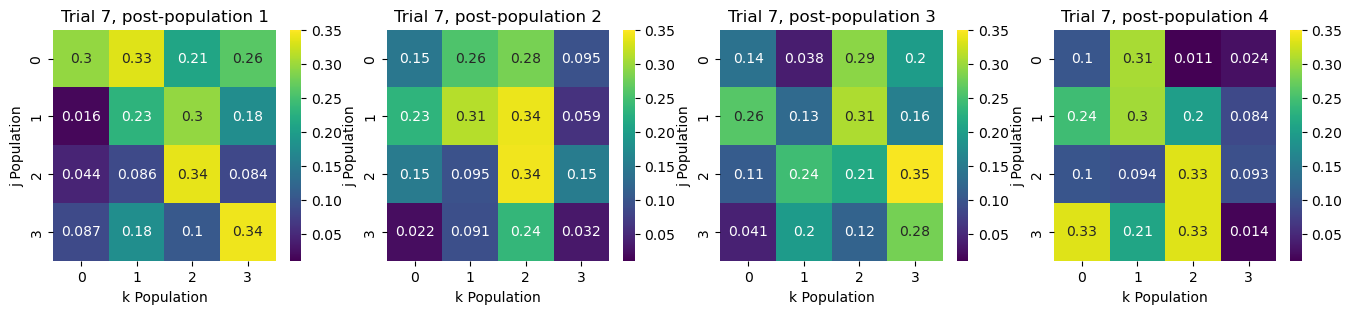

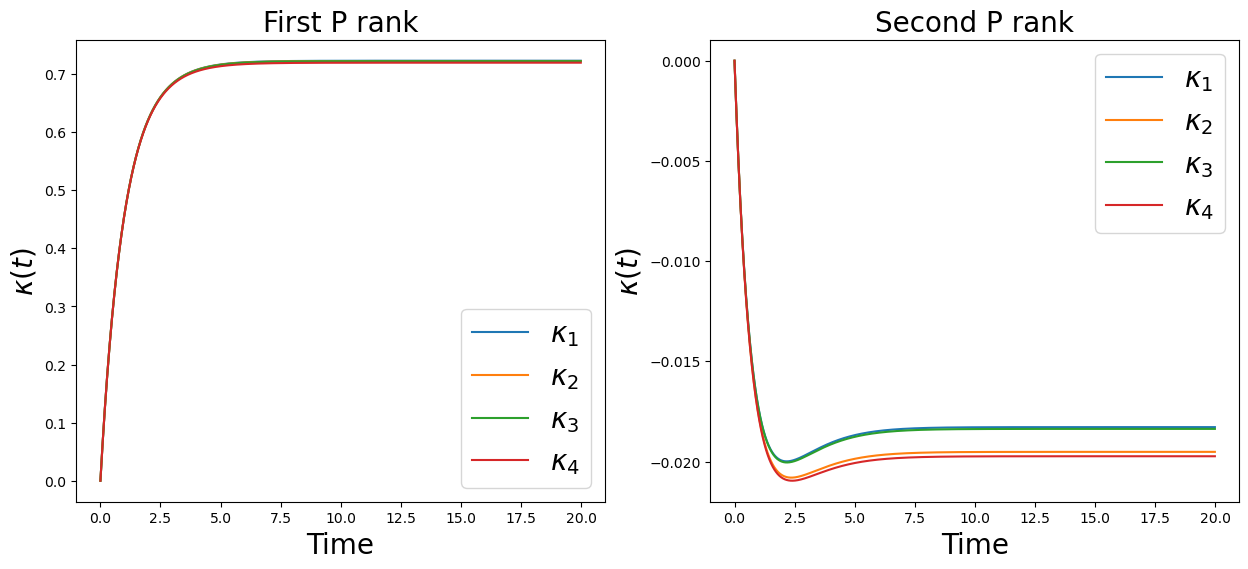

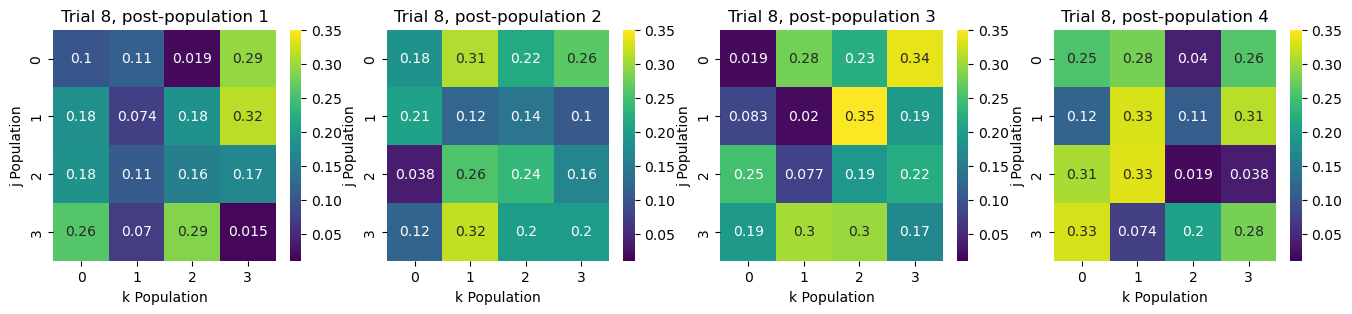

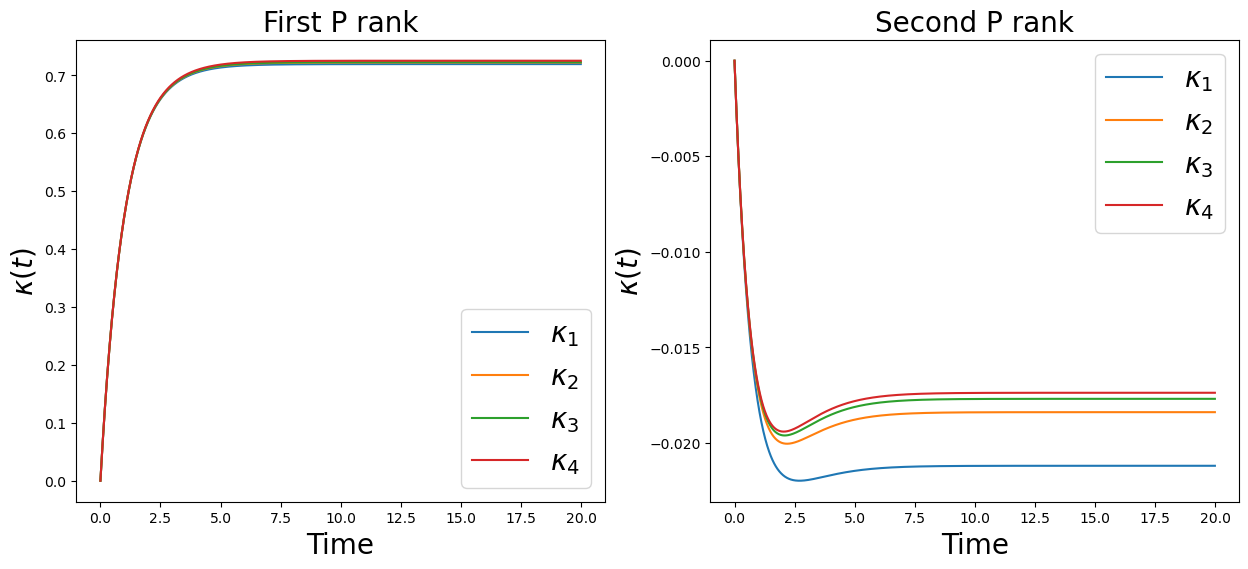

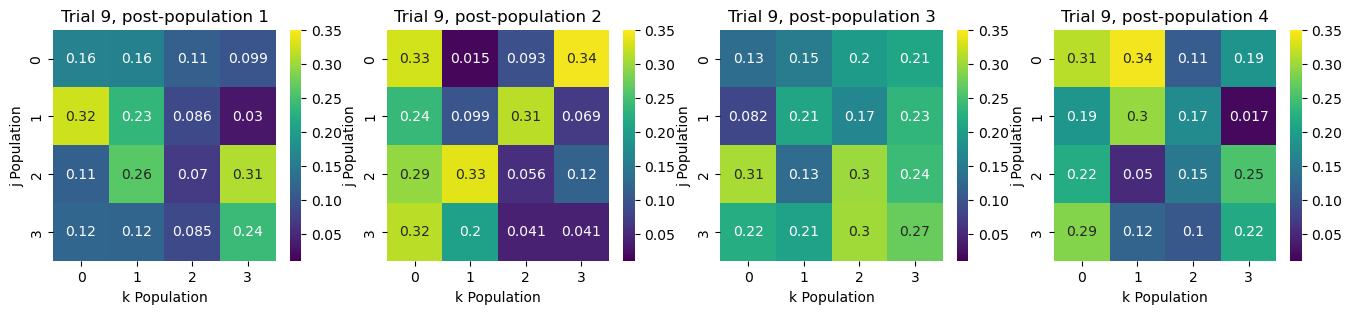

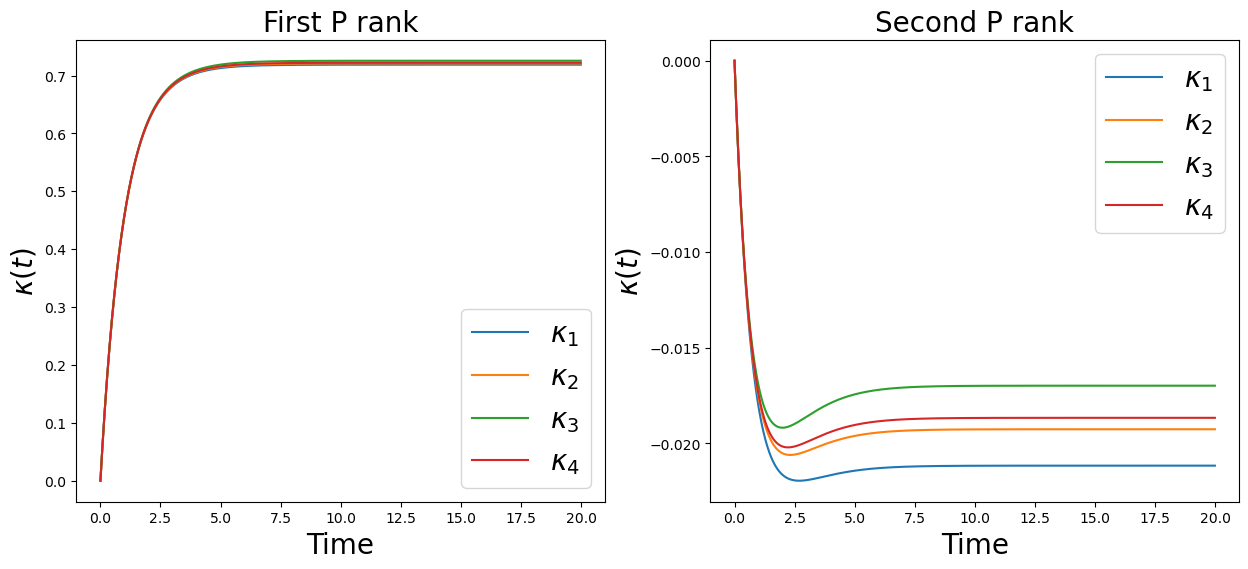

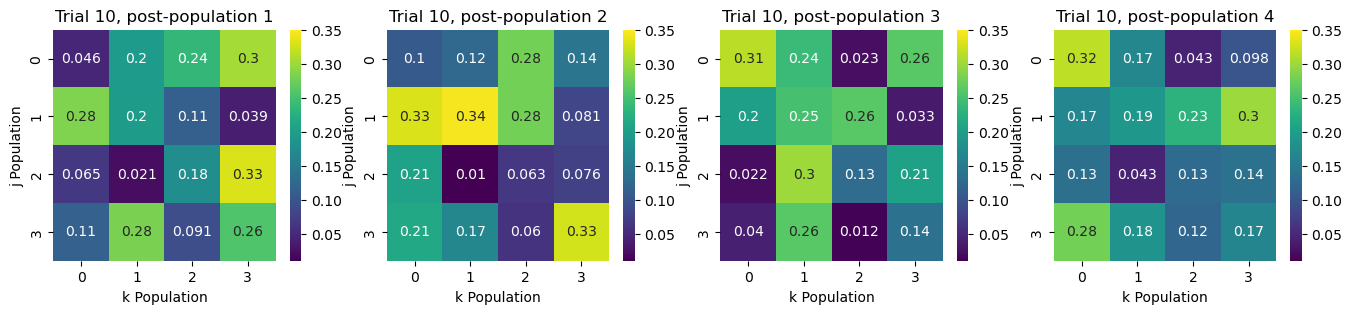

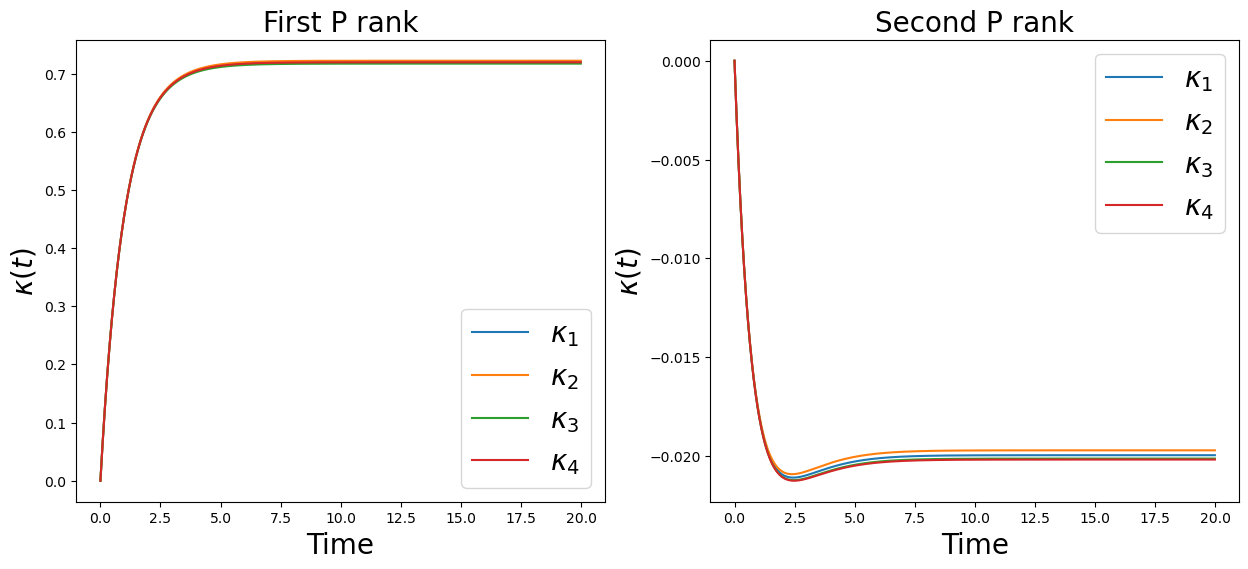

In [98]:
N_trials = 10

for k_trial in range(N_trials):
    
    plt.figure(figsize=(16.5, 3))
    TauChain = np.zeros((N_population, N_population, N_population))
    TauChain += np.random.uniform(0.01, 0.35, (N_population, N_population, N_population))
    if(k_trial==0):
        TauChain = np.zeros((N_population, N_population, N_population))
    for i in range(N_population):
        plt.subplot(1, N_population, i+1)
        sns.heatmap(TauChain[i, :, :], annot=True, cmap='viridis', vmin=0.01, vmax=0.35)
        plt.title(f'Trial {k_trial+1}, post-population {i+1}')
        plt.xlabel('k Population')
        plt.ylabel('j Population')
    plt.show()
        
    SigmaU2 = np.zeros((N_population, N_population))     # population, rank
    for x in range(N_population):
        for k in range(N_population):
            for y in range(N_population):
                SigmaU2[x, k] += (sigma**2/N_neuron) * np.abs(TauChain[y, x, k])
                
    k_res = np.zeros((2*N_population, N_time))   # initial condition

    for i_t in range(N_time-1):
    
        for r_uv in range(N_population):    # varianve variables
            delta_p_ruv = np.dot(SigmaU2[r_uv, :], k_res[:N_population, i_t]**2)
            k_res[r_uv, i_t+1] = k_res[r_uv, i_t] + (dt/time_scale) * (- k_res[r_uv, i_t] + N_neuron_arr[r_uv] * Phi(k_res[r_uv+N_population, i_t], delta_p_ruv, bias, thres) )
        
        for r_mn in range(N_population):    # mean variables
            delta_p_rmn = np.dot(SigmaU2[r_mn, :], k_res[:N_population, i_t]**2)
            recurrent_term = 0
            for x in range(N_population):
                recurrent_term += N_neuron_arr[x] * ((sigma**2/N_neuron)*np.dot(TauChain[r_mn, x, :], k_res[:N_population, i_t]) * derPhi(k_res[x+N_population, i_t], delta_p_rmn, thres) + j0_mat[r_mn,x] * Phi(k_res[x+N_population, i_t], delta_p_rmn, bias, thres))
            k_res[r_mn+N_population, i_t+1] = k_res[r_mn+N_population, i_t] + (dt/time_scale) * (- k_res[r_mn+N_population, i_t] + recurrent_term)

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('First P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.subplot(1, 2, 2)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[N_population + i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('Second P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.show()


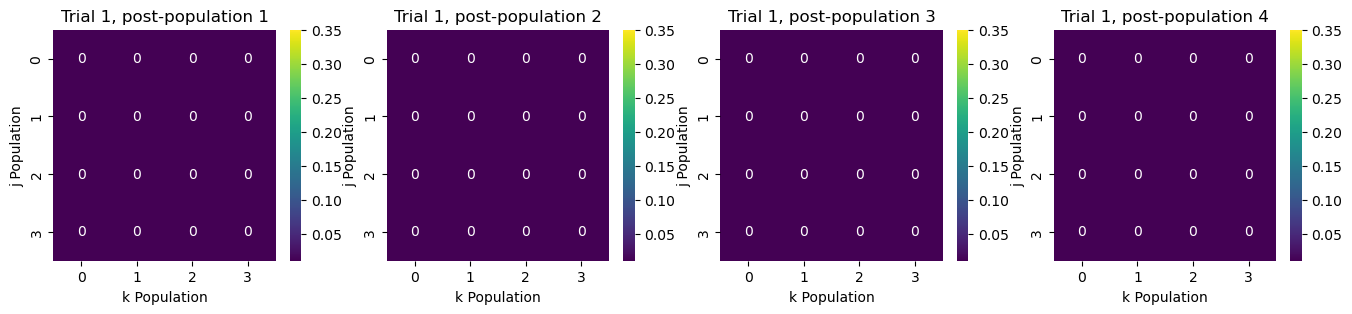

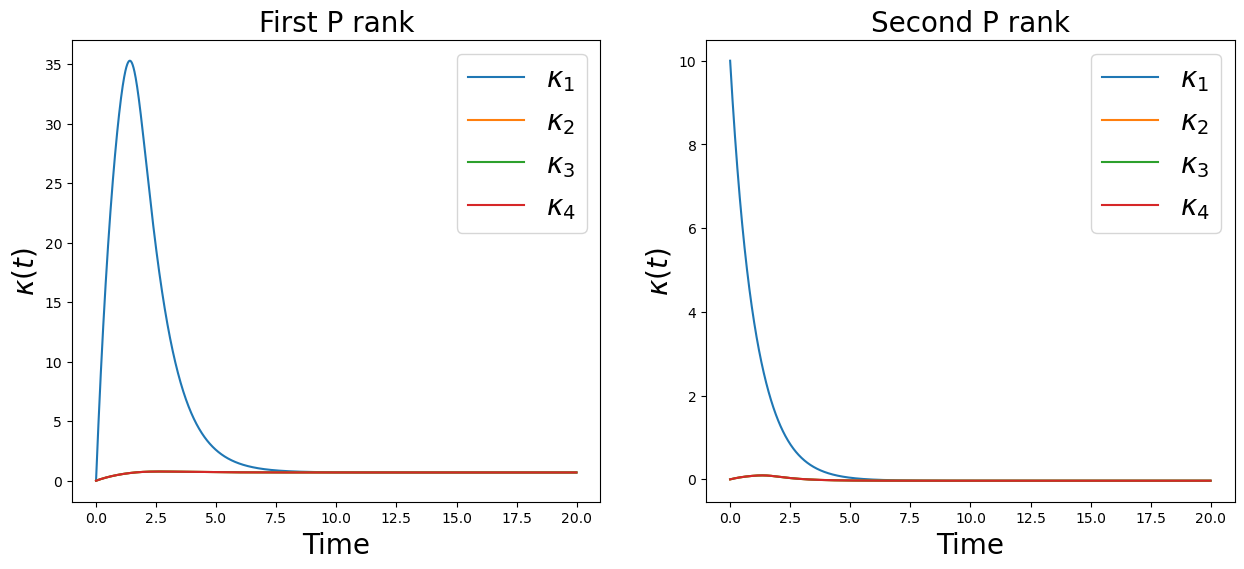

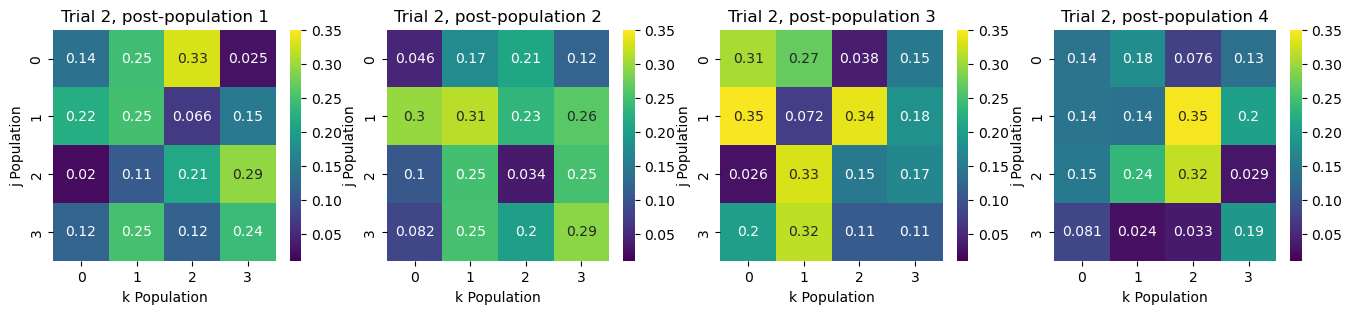

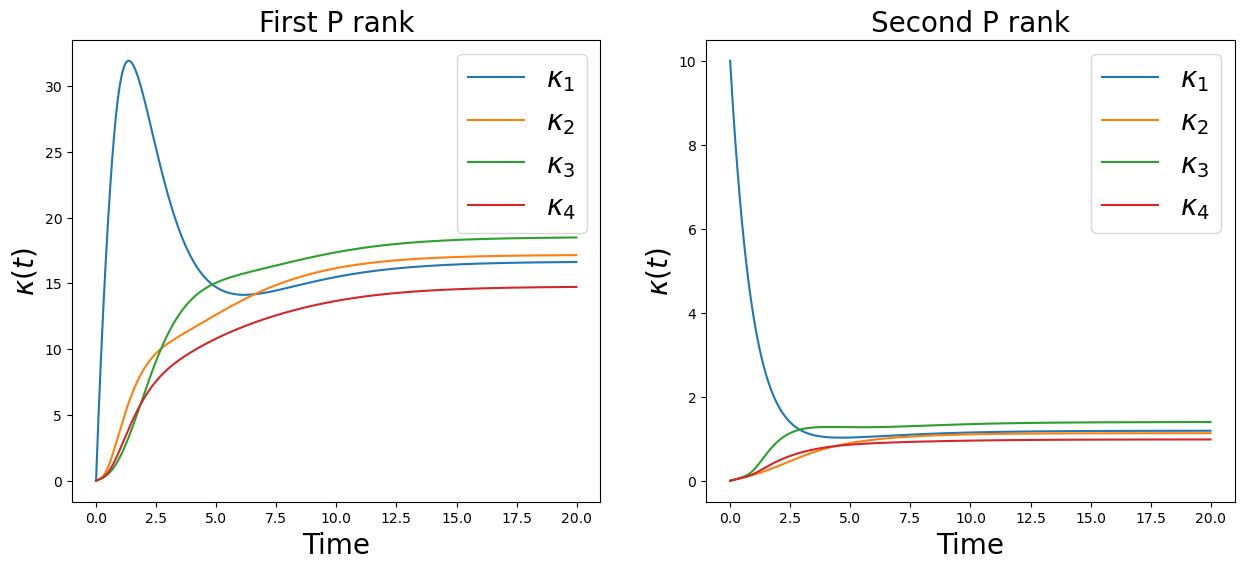

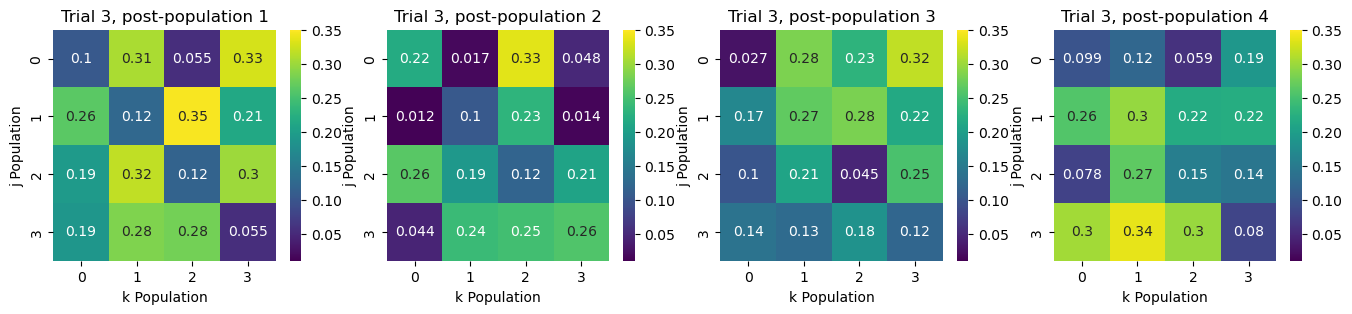

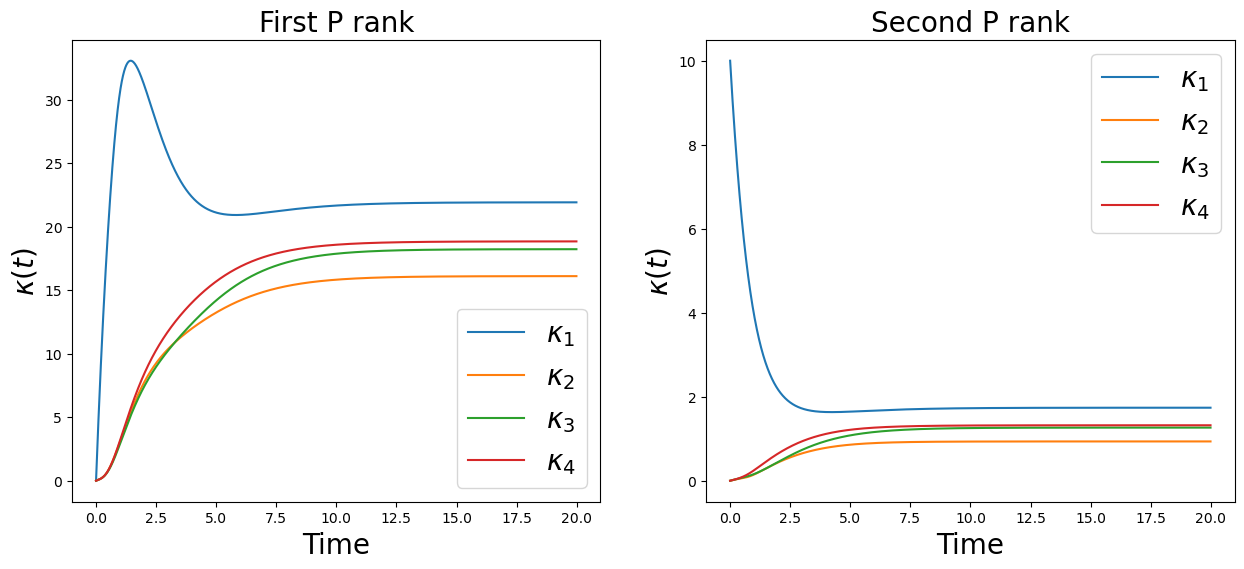

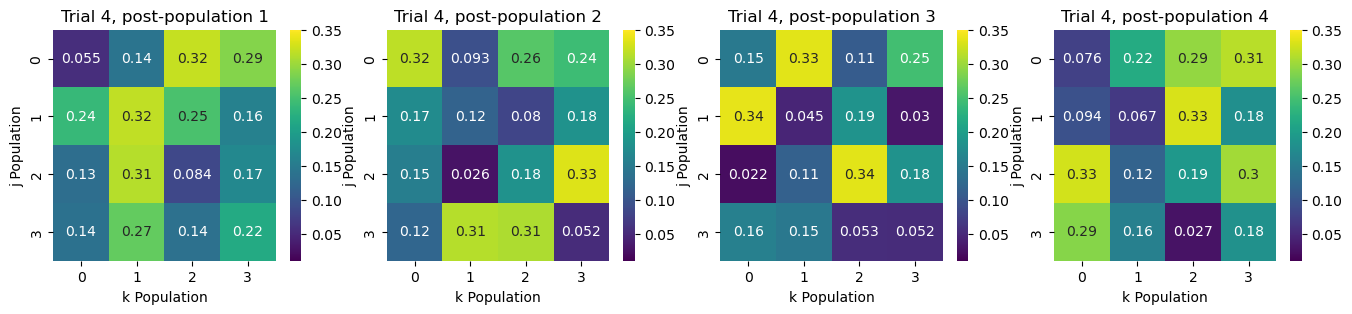

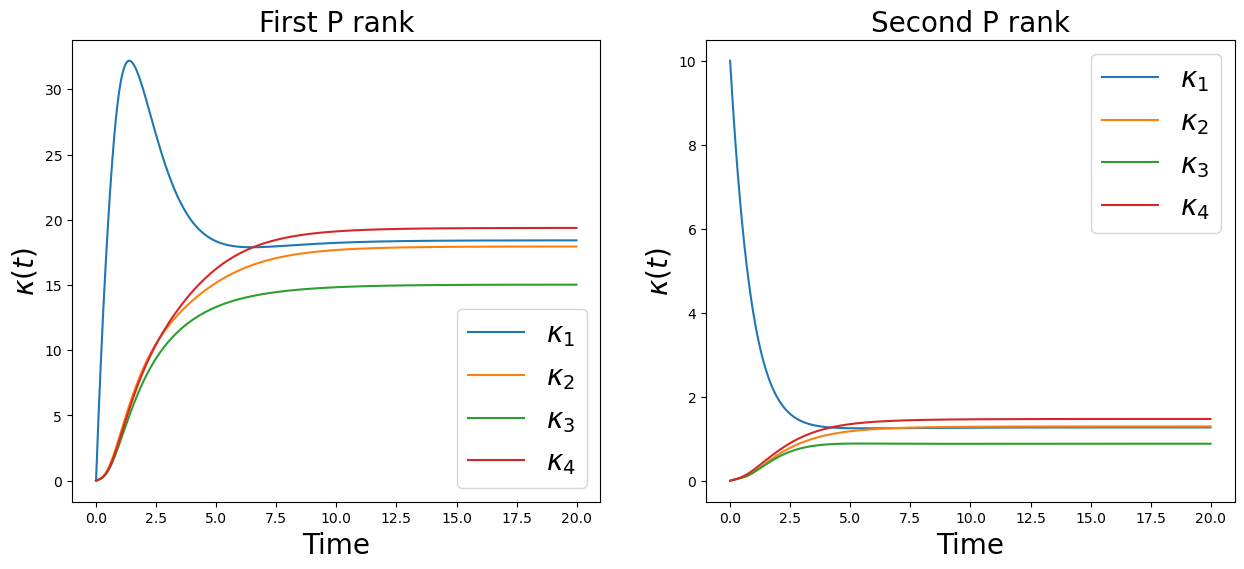

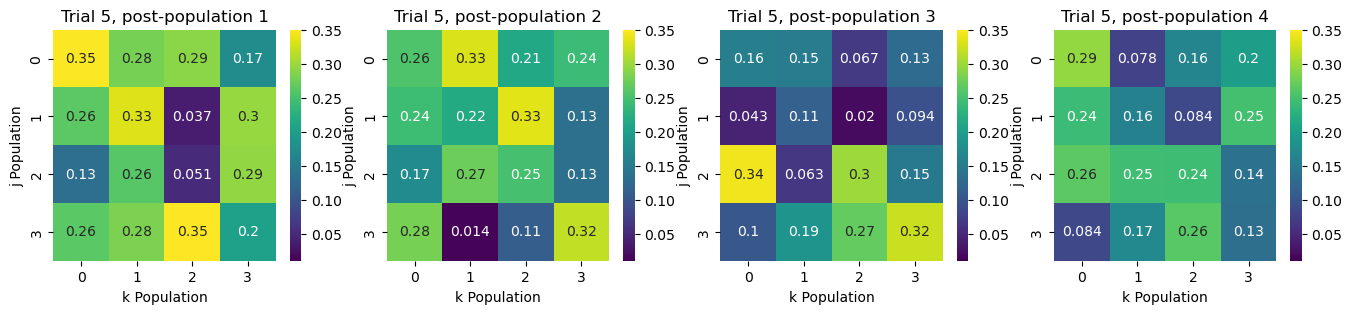

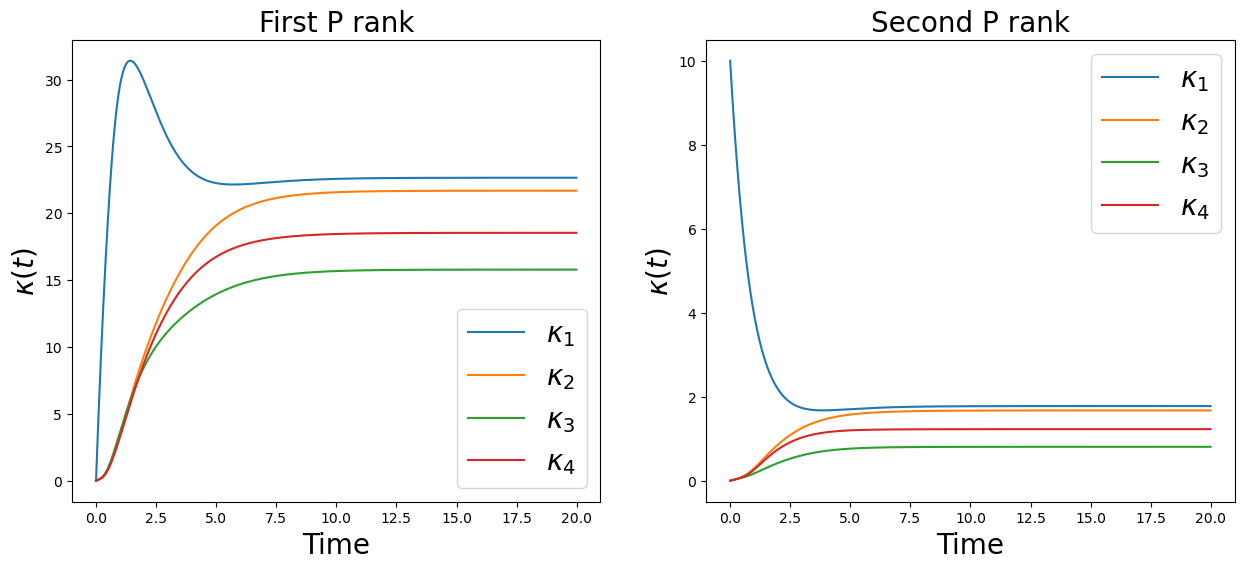

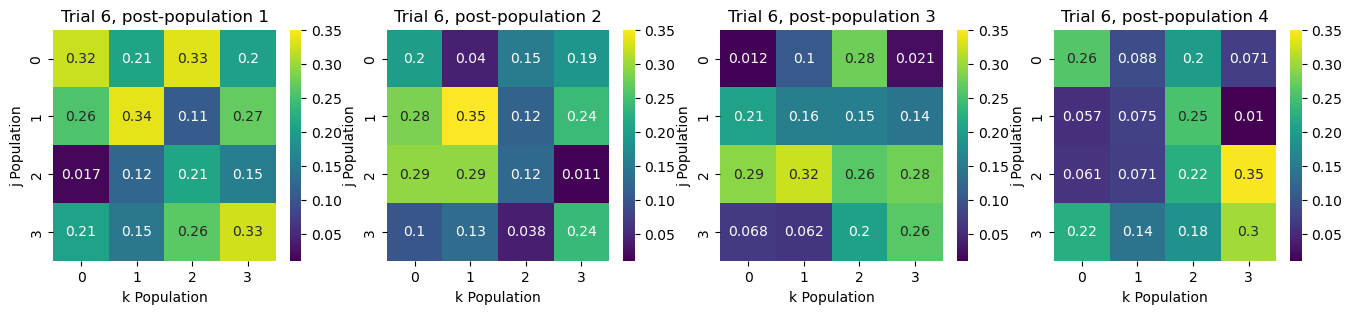

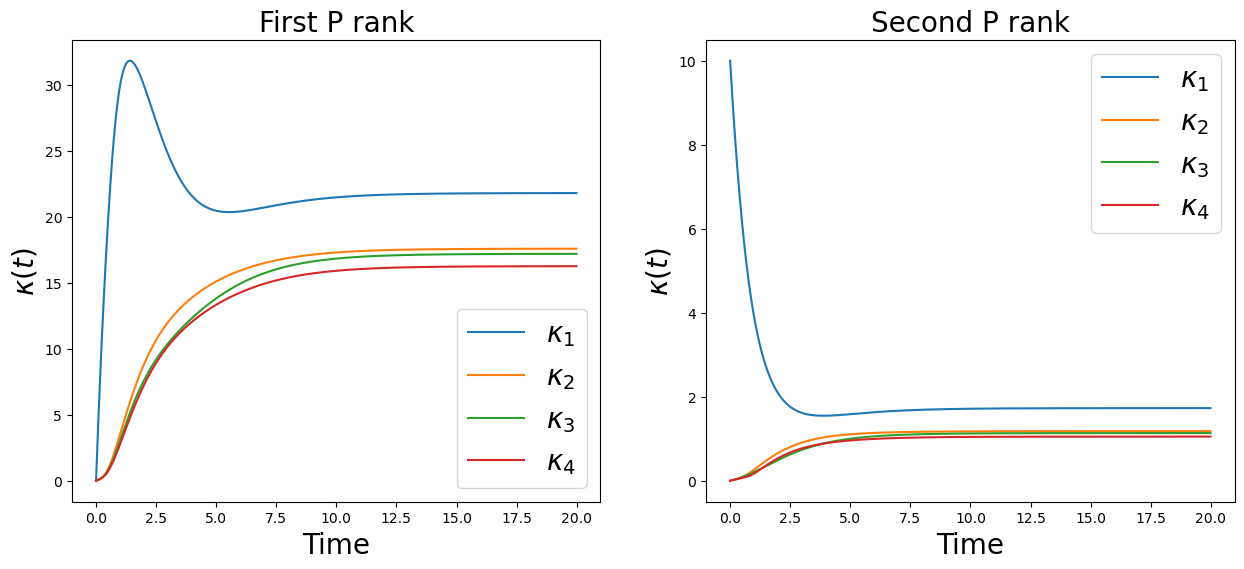

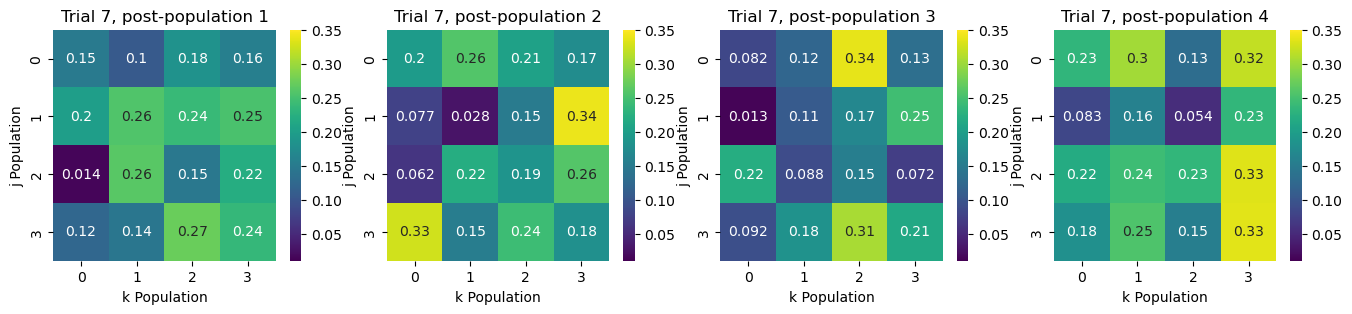

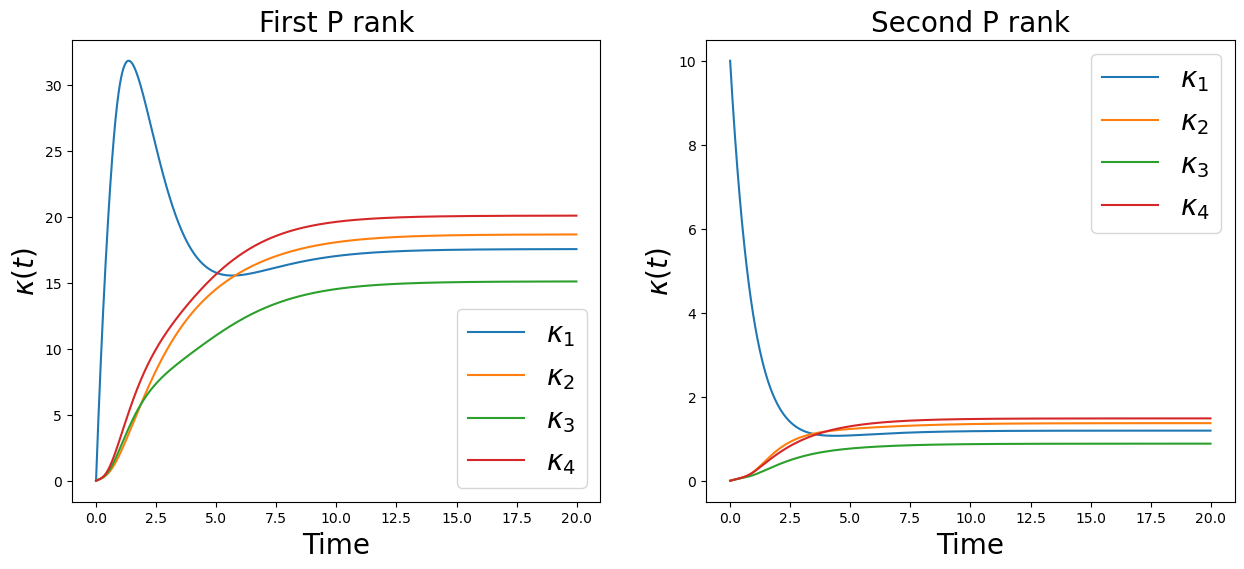

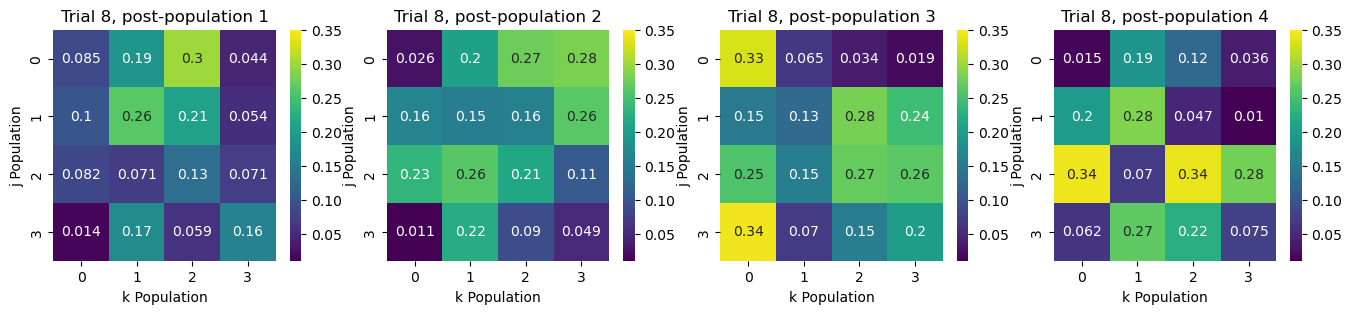

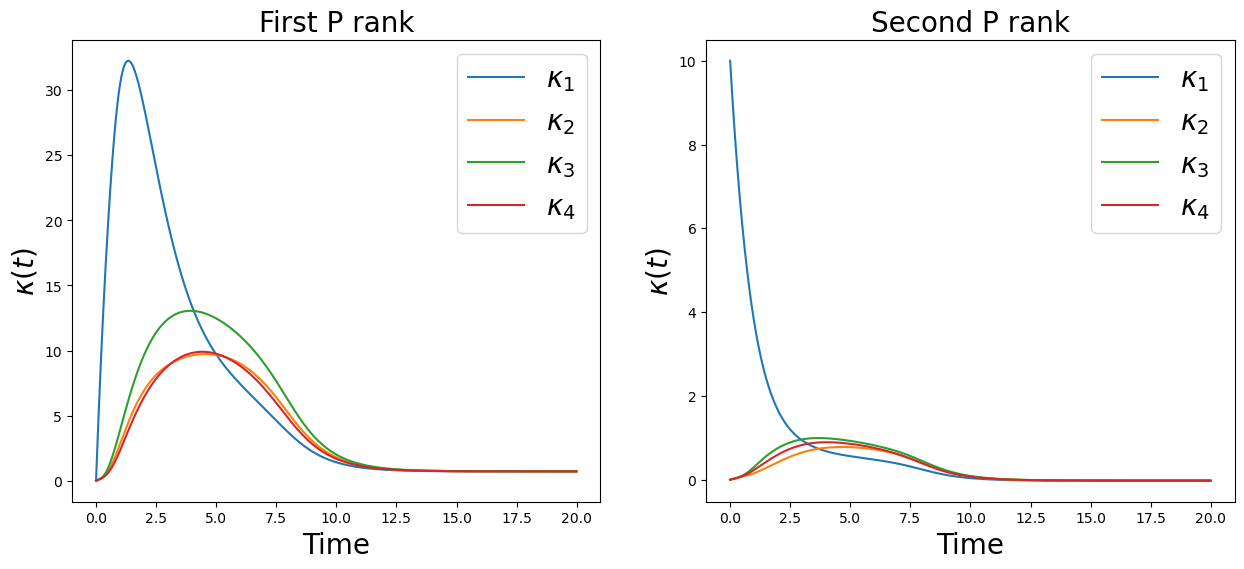

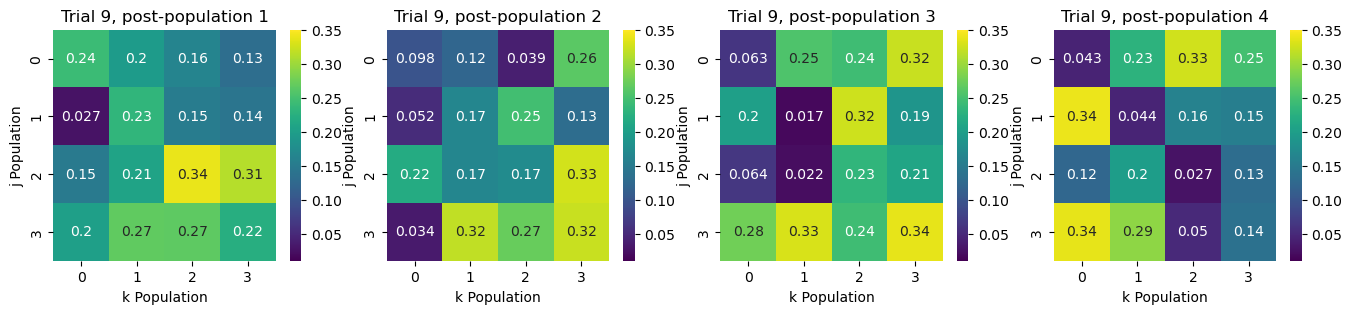

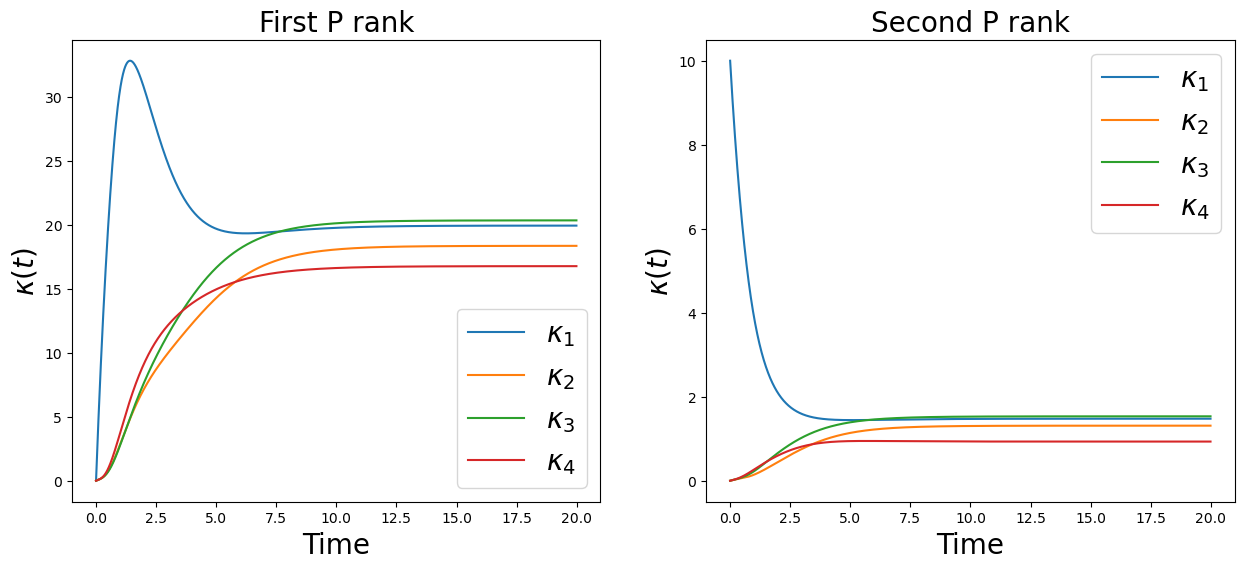

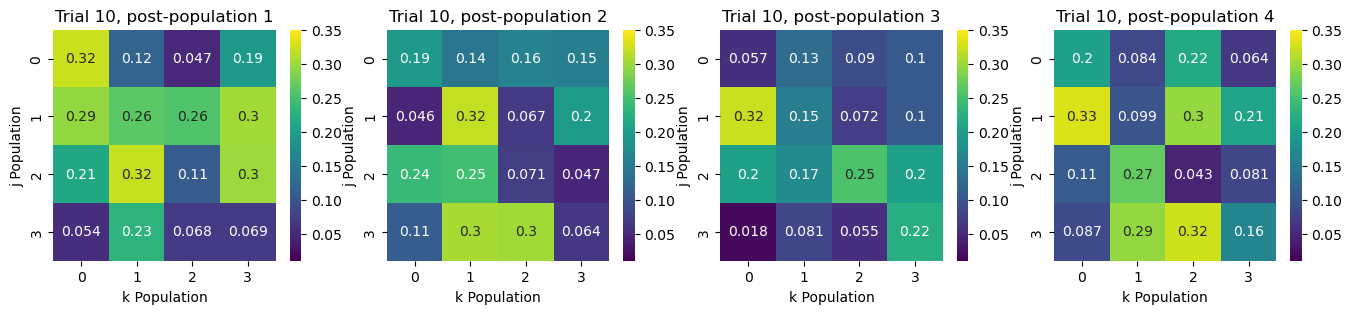

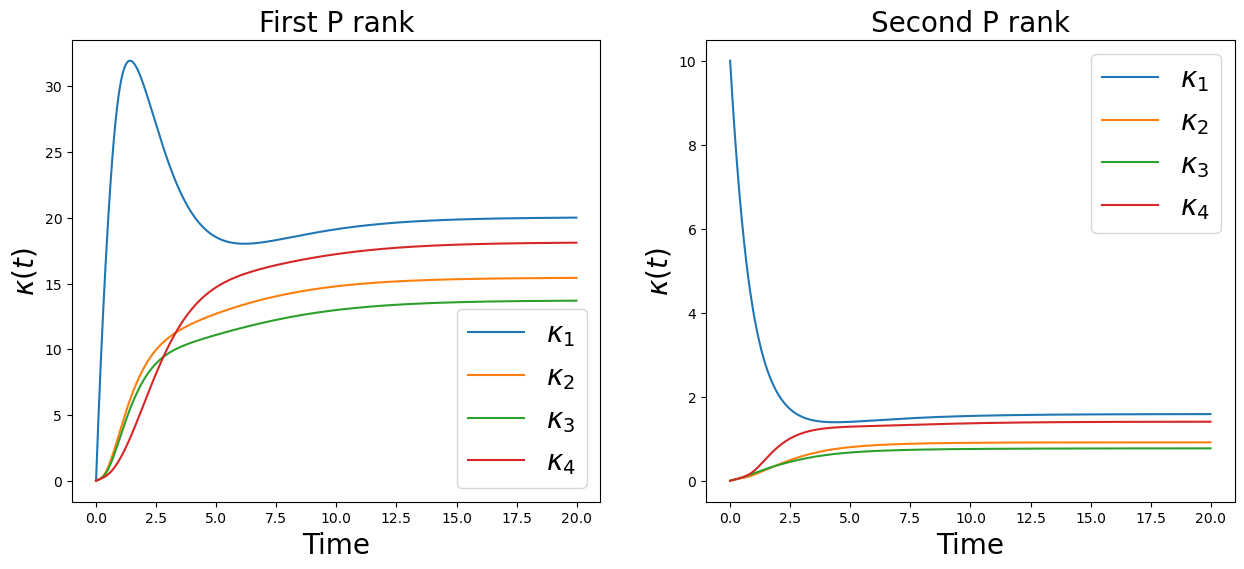

In [99]:
N_trials = 10

for k_trial in range(N_trials):
    
    plt.figure(figsize=(16.5, 3))
    TauChain = np.zeros((N_population, N_population, N_population))
    TauChain += np.random.uniform(0.01, 0.35, (N_population, N_population, N_population))
    if(k_trial==0):
        TauChain = np.zeros((N_population, N_population, N_population))
    for i in range(N_population):
        plt.subplot(1, N_population, i+1)
        sns.heatmap(TauChain[i, :, :], annot=True, cmap='viridis', vmin=0.01, vmax=0.35)
        plt.title(f'Trial {k_trial+1}, post-population {i+1}')
        plt.xlabel('k Population')
        plt.ylabel('j Population')
    plt.show()
        
    SigmaU2 = np.zeros((N_population, N_population))     # population, rank
    for x in range(N_population):
        for k in range(N_population):
            for y in range(N_population):
                SigmaU2[x, k] += (sigma**2/N_neuron) * np.abs(TauChain[y, x, k])
                
    k_res = np.zeros((2*N_population, N_time))   # initial condition
    k_res[N_population, 0] = 10.0    # Initial condition

    for i_t in range(N_time-1):
    
        for r_uv in range(N_population):    # varianve variables
            delta_p_ruv = np.dot(SigmaU2[r_uv, :], k_res[:N_population, i_t]**2)
            k_res[r_uv, i_t+1] = k_res[r_uv, i_t] + (dt/time_scale) * (- k_res[r_uv, i_t] + N_neuron_arr[r_uv] * Phi(k_res[r_uv+N_population, i_t], delta_p_ruv, bias, thres) )
        
        for r_mn in range(N_population):    # mean variables
            delta_p_rmn = np.dot(SigmaU2[r_mn, :], k_res[:N_population, i_t]**2)
            recurrent_term = 0
            for x in range(N_population):
                recurrent_term += N_neuron_arr[x] * ((sigma**2/N_neuron)*np.dot(TauChain[r_mn, x, :], k_res[:N_population, i_t]) * derPhi(k_res[x+N_population, i_t], delta_p_rmn, thres) + j0_mat[r_mn,x] * Phi(k_res[x+N_population, i_t], delta_p_rmn, bias, thres))
            k_res[r_mn+N_population, i_t+1] = k_res[r_mn+N_population, i_t] + (dt/time_scale) * (- k_res[r_mn+N_population, i_t] + recurrent_term)

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('First P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.subplot(1, 2, 2)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[N_population + i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('Second P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.show()


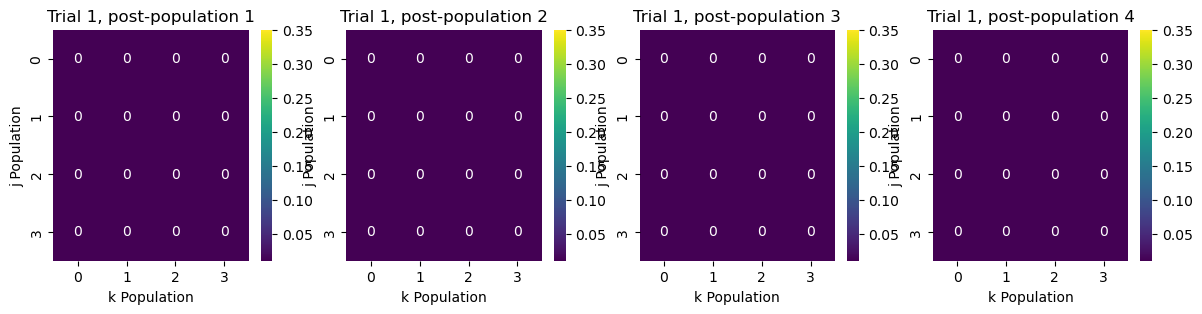

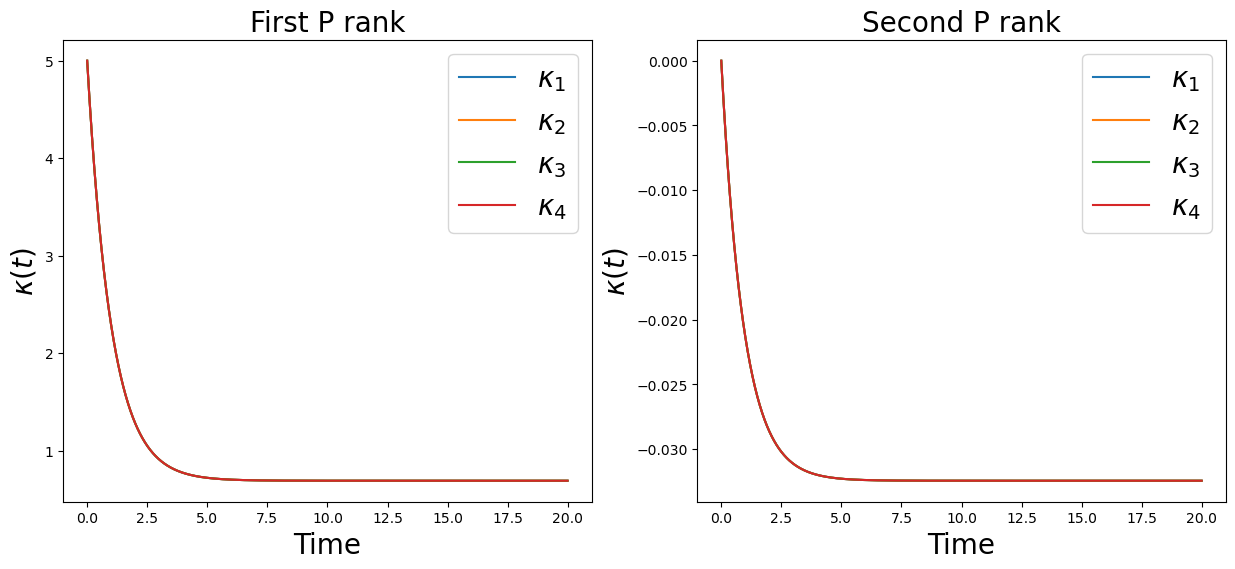

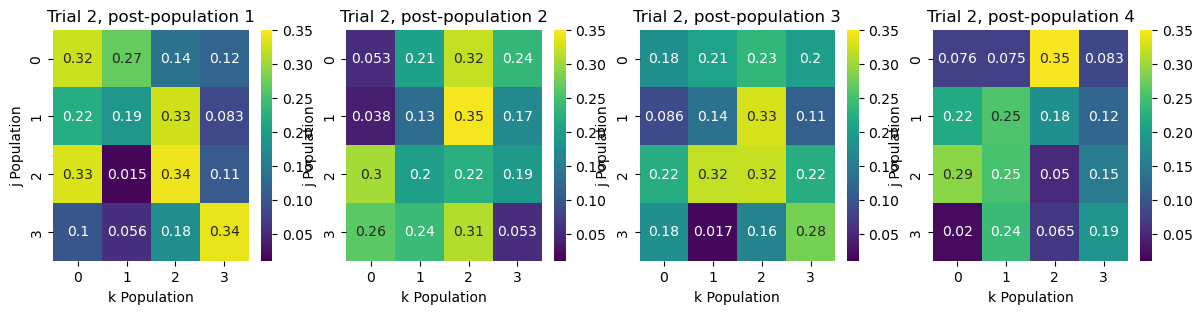

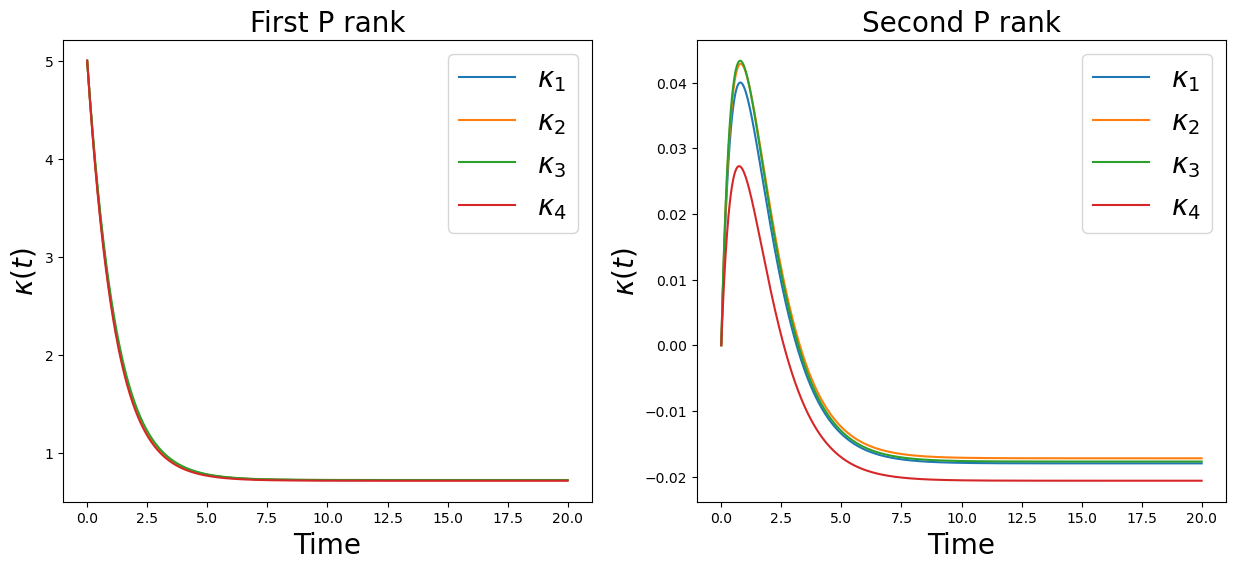

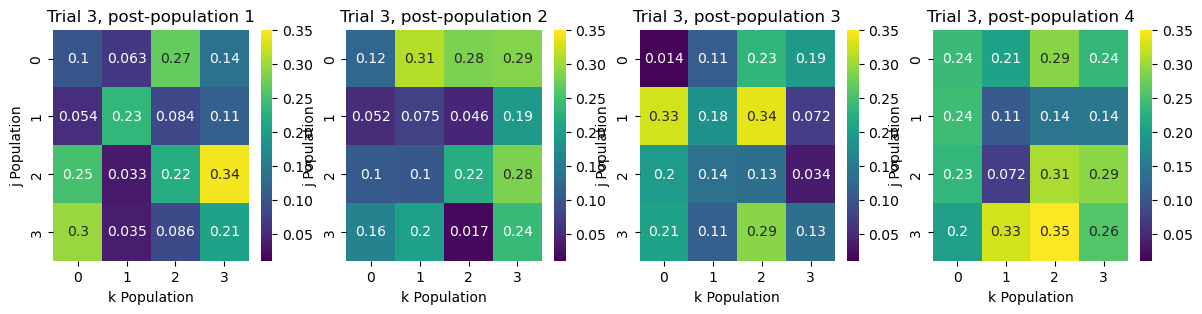

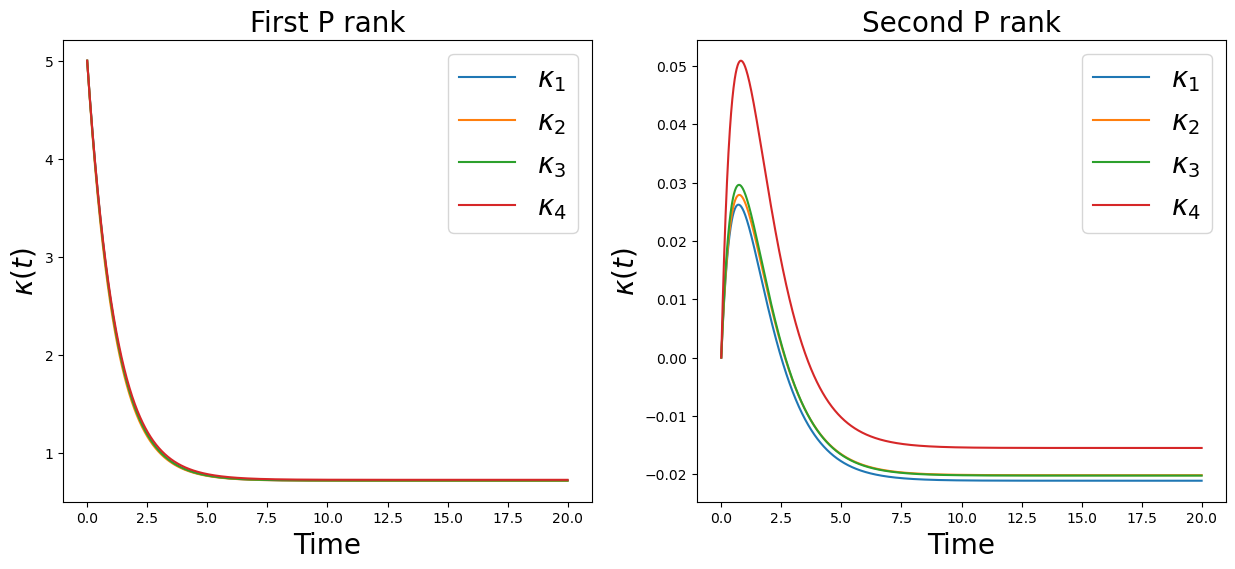

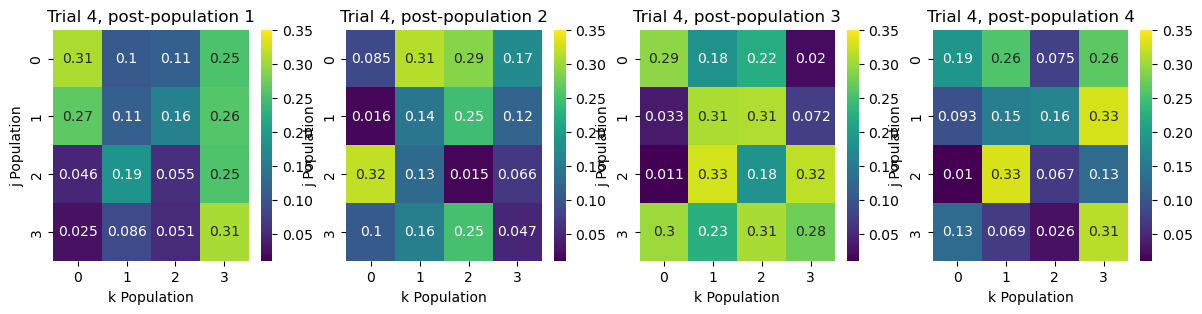

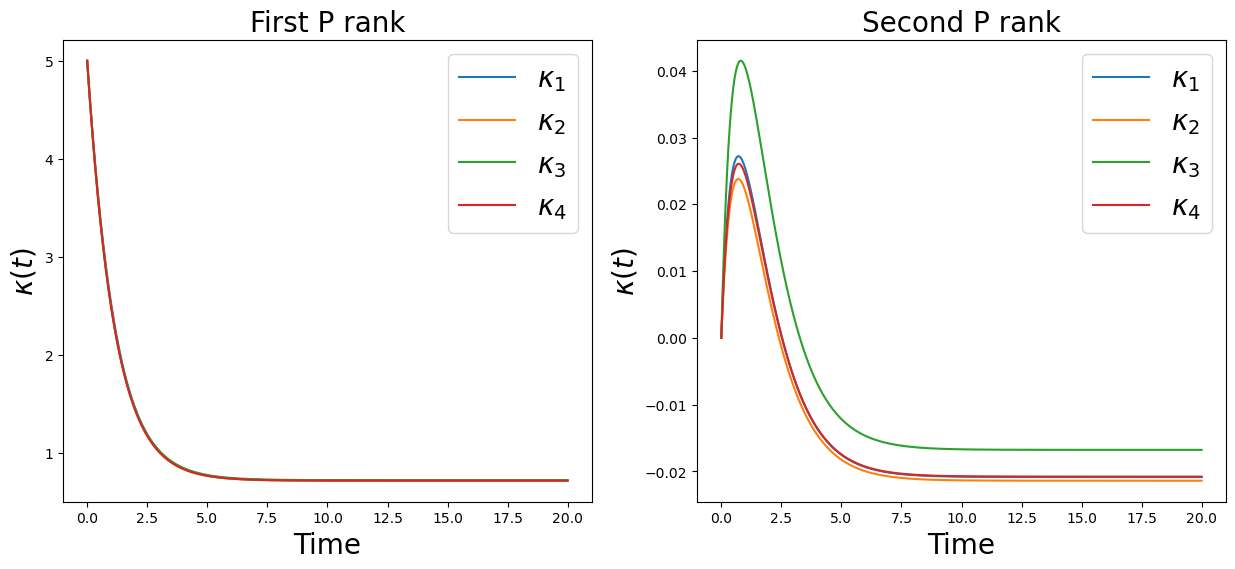

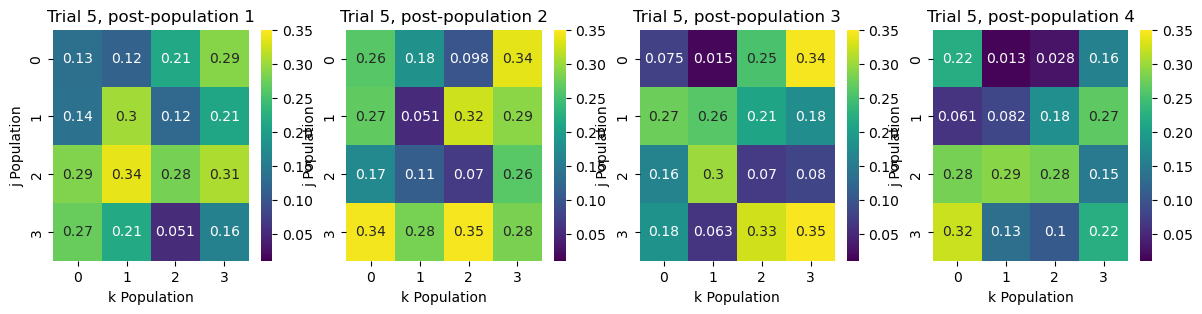

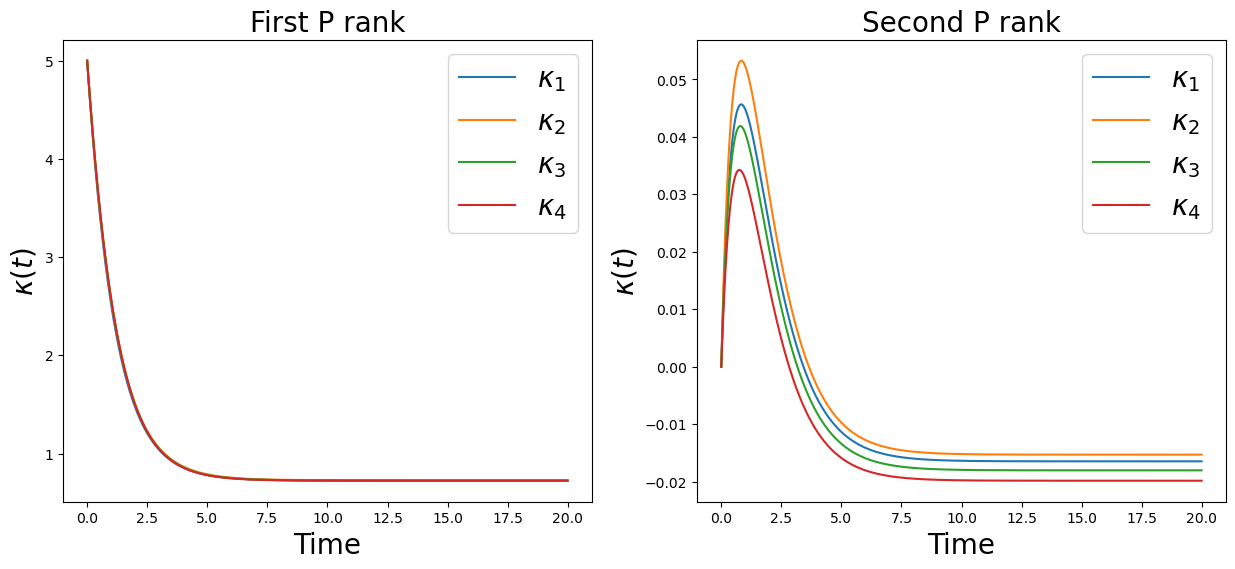

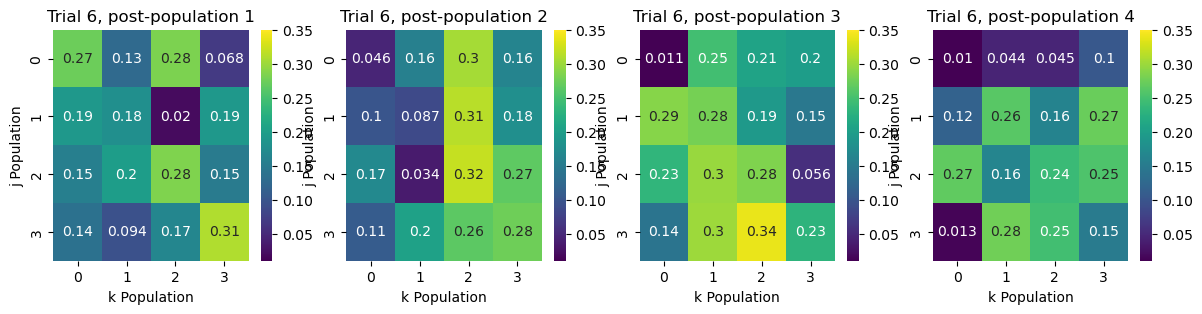

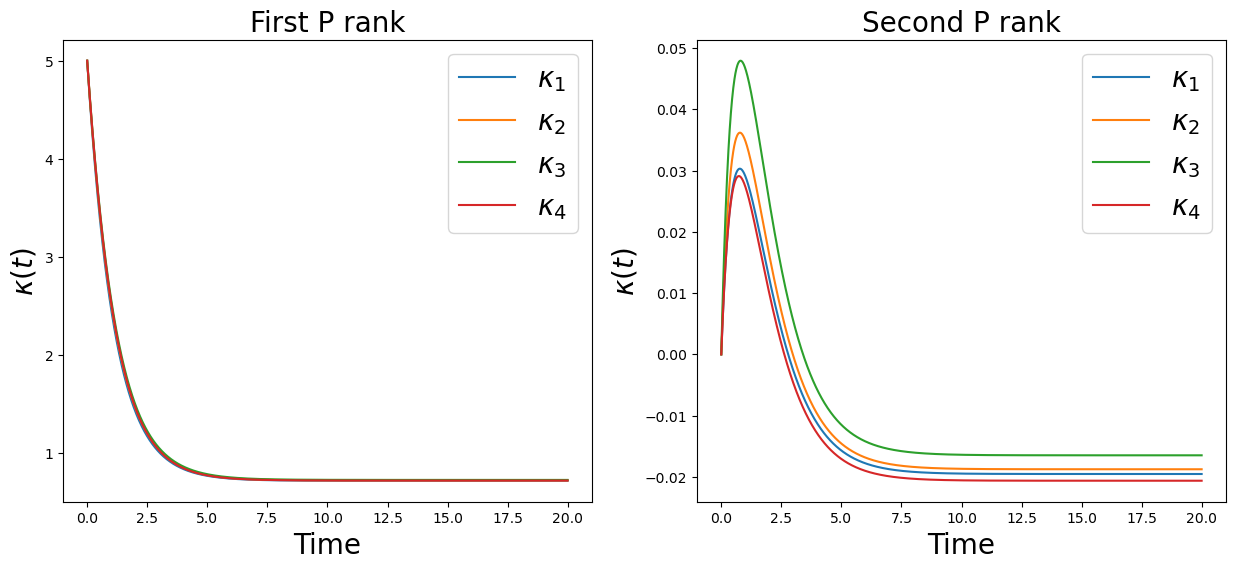

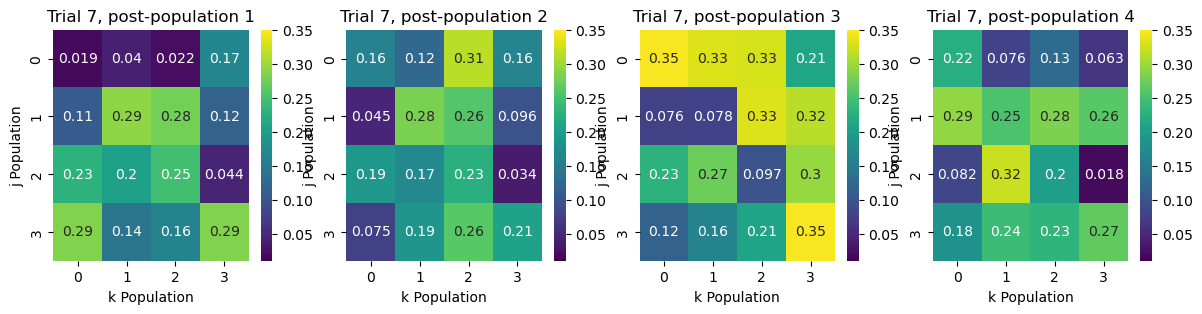

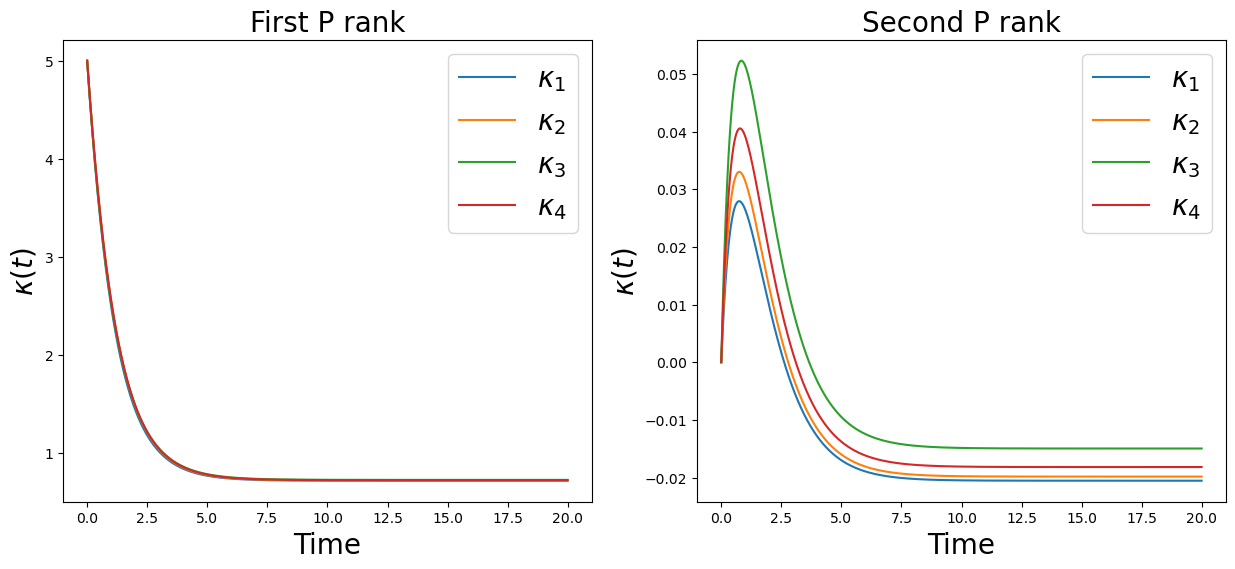

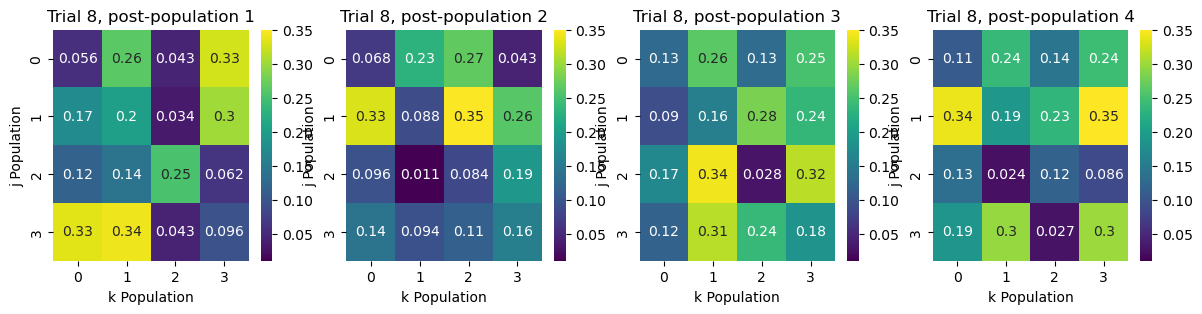

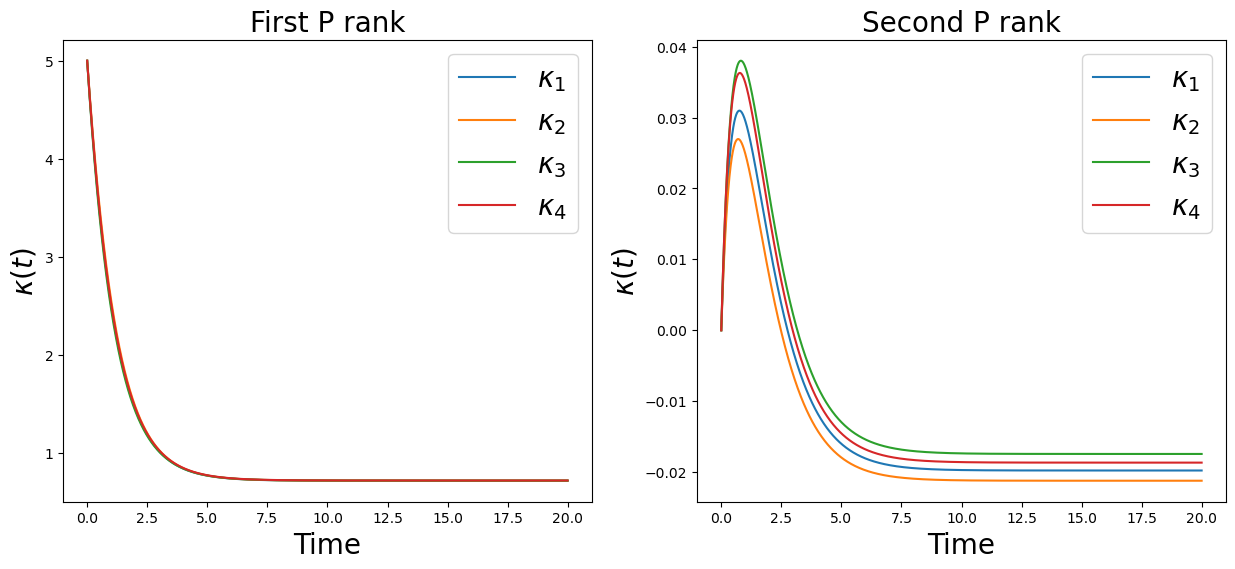

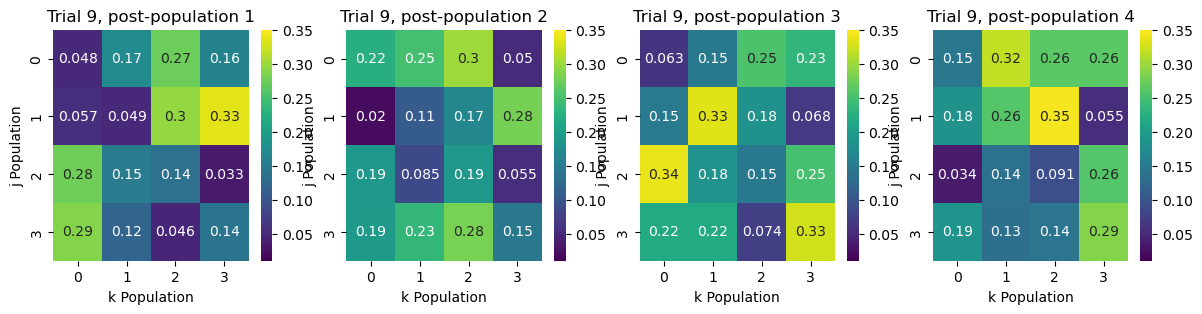

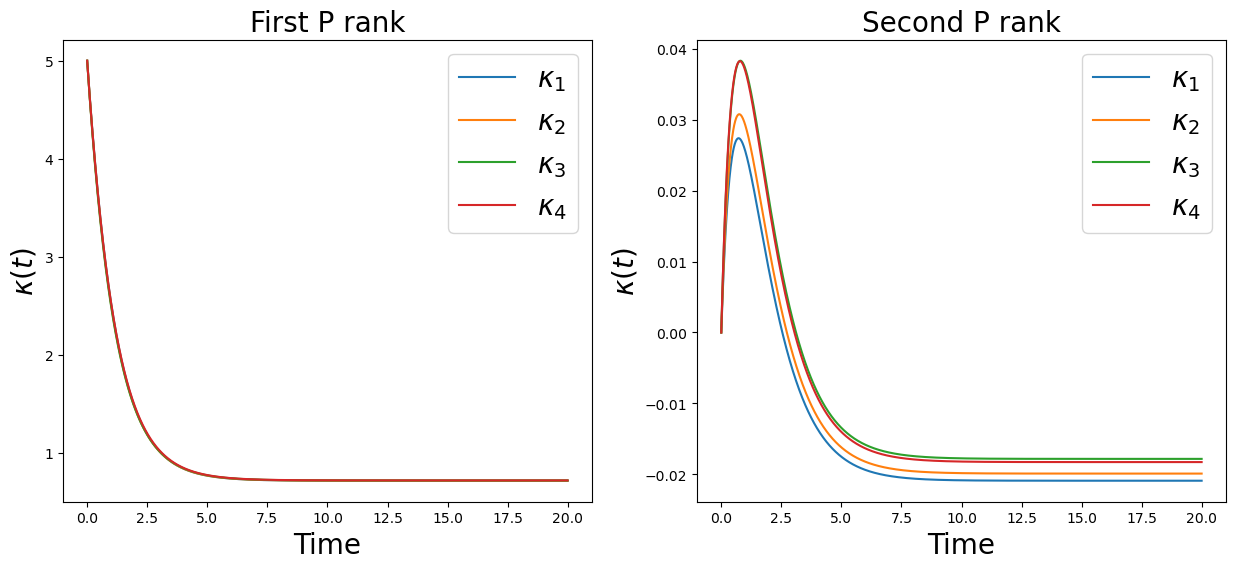

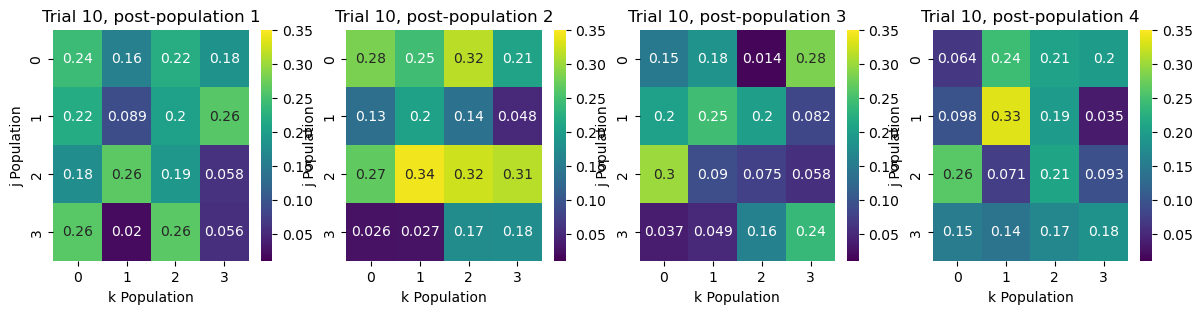

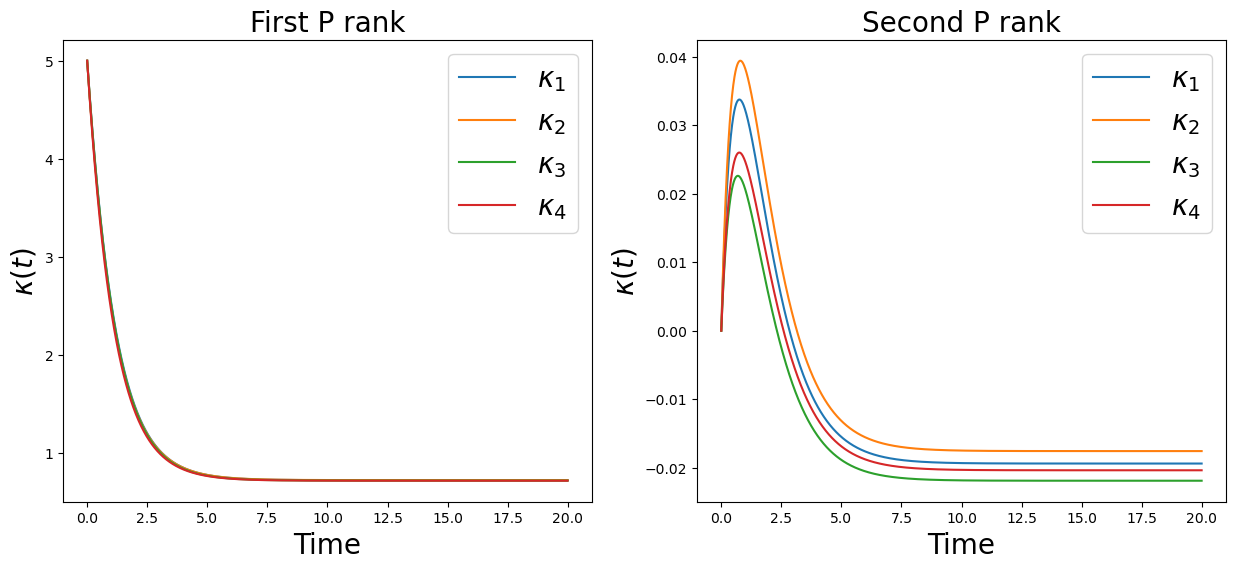

In [100]:
N_trials = 10

for k_trial in range(N_trials):
    
    plt.figure(figsize=(14.5, 3))
    TauChain = np.zeros((N_population, N_population, N_population))
    TauChain += np.random.uniform(0.01, 0.35, (N_population, N_population, N_population))
    if(k_trial==0):
        TauChain = np.zeros((N_population, N_population, N_population))
    for i in range(N_population):
        plt.subplot(1, N_population, i+1)
        sns.heatmap(TauChain[i, :, :], annot=True, cmap='viridis', vmin=0.01, vmax=0.35)
        plt.title(f'Trial {k_trial+1}, post-population {i+1}')
        plt.xlabel('k Population')
        plt.ylabel('j Population')
    plt.show()
        
    SigmaU2 = np.zeros((N_population, N_population))     # population, rank
    for x in range(N_population):
        for k in range(N_population):
            for y in range(N_population):
                SigmaU2[x, k] += (sigma**2/N_neuron) * np.abs(TauChain[y, x, k])
                
    k_res = np.zeros((2*N_population, N_time))   # initial condition
    k_res[:N_population, 0] = 5.0    # Initial condition

    for i_t in range(N_time-1):
    
        for r_uv in range(N_population):    # varianve variables
            delta_p_ruv = np.dot(SigmaU2[r_uv, :], k_res[:N_population, i_t]**2)
            k_res[r_uv, i_t+1] = k_res[r_uv, i_t] + (dt/time_scale) * (- k_res[r_uv, i_t] + N_neuron_arr[r_uv] * Phi(k_res[r_uv+N_population, i_t], delta_p_ruv, bias, thres) )
        
        for r_mn in range(N_population):    # mean variables
            delta_p_rmn = np.dot(SigmaU2[r_mn, :], k_res[:N_population, i_t]**2)
            recurrent_term = 0
            for x in range(N_population):
                recurrent_term += N_neuron_arr[x] * ((sigma**2/N_neuron)*np.dot(TauChain[r_mn, x, :], k_res[:N_population, i_t]) * derPhi(k_res[x+N_population, i_t], delta_p_rmn, thres) + j0_mat[r_mn,x] * Phi(k_res[x+N_population, i_t], delta_p_rmn, bias, thres))
            k_res[r_mn+N_population, i_t+1] = k_res[r_mn+N_population, i_t] + (dt/time_scale) * (- k_res[r_mn+N_population, i_t] + recurrent_term)

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('First P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.subplot(1, 2, 2)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[N_population + i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('Second P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.show()


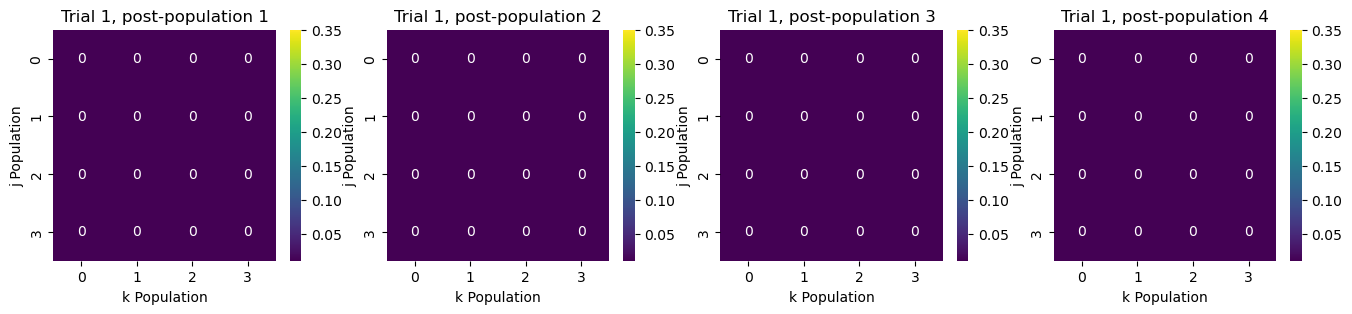

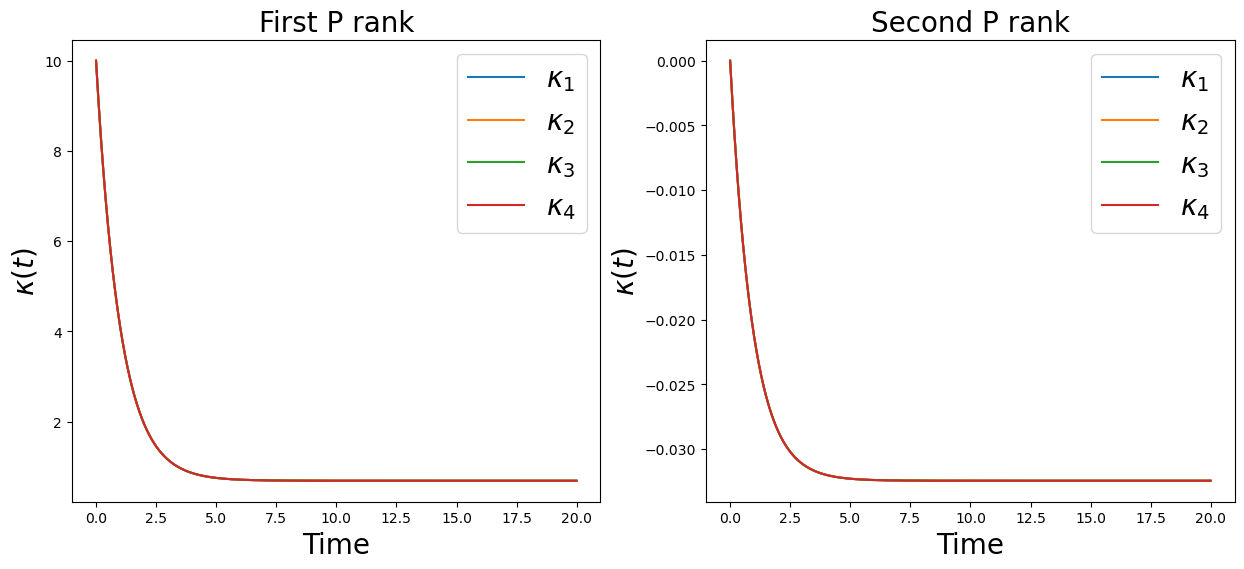

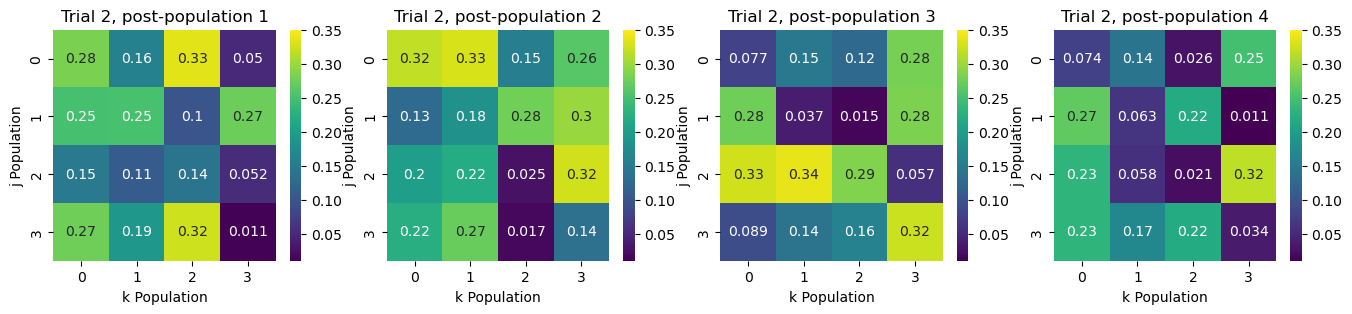

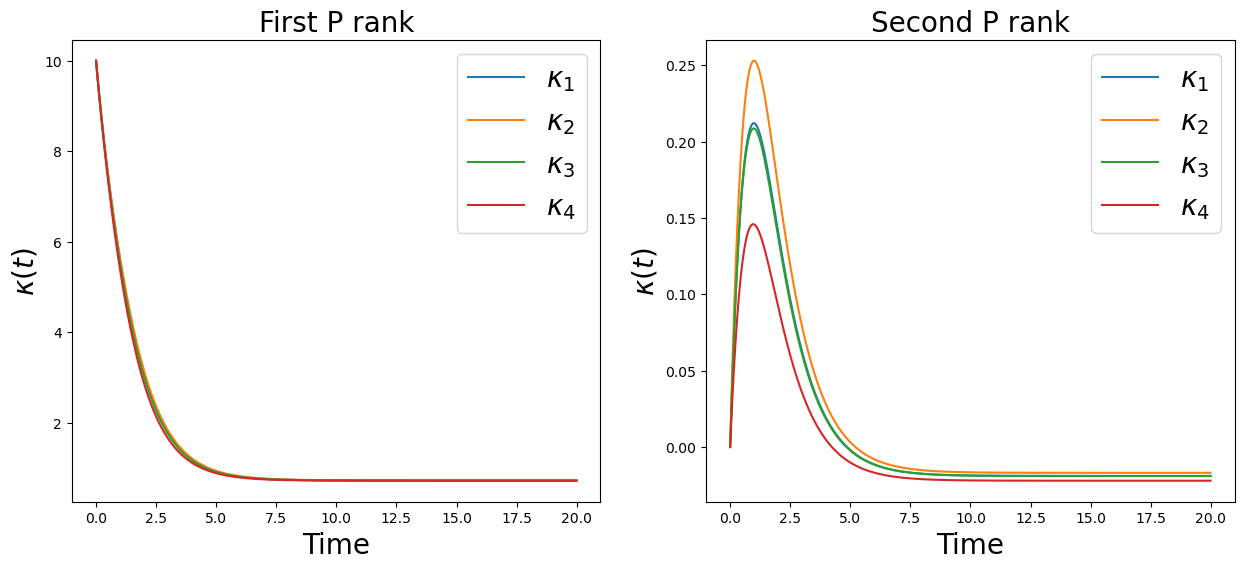

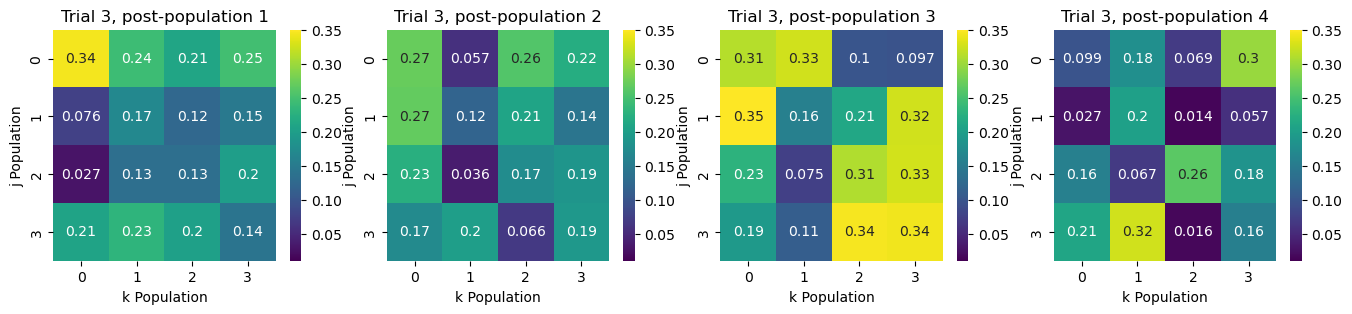

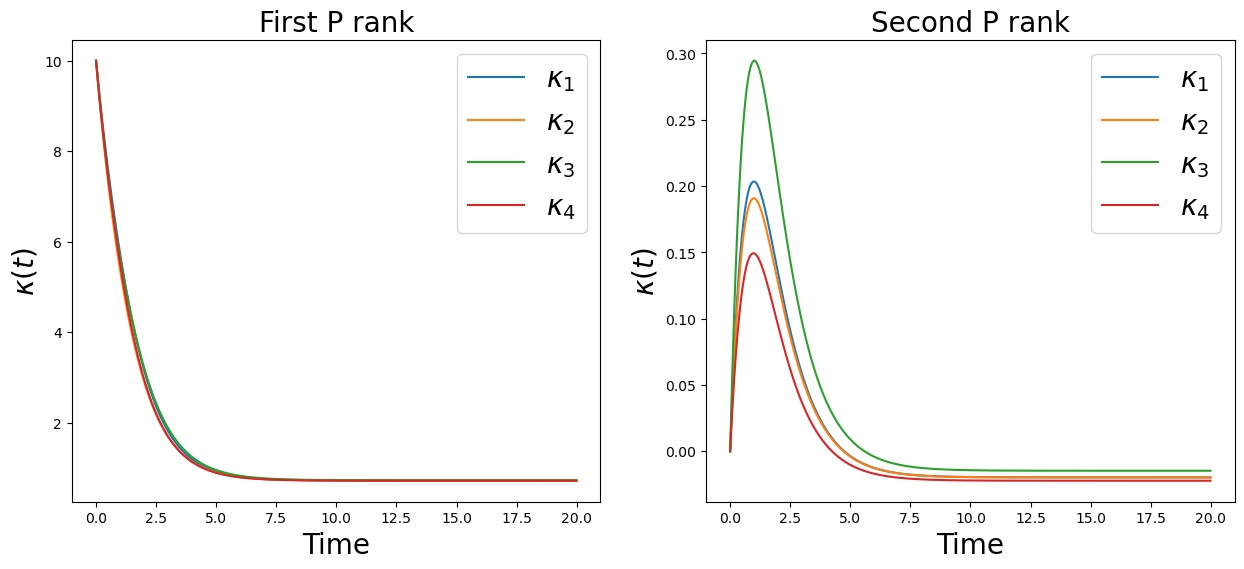

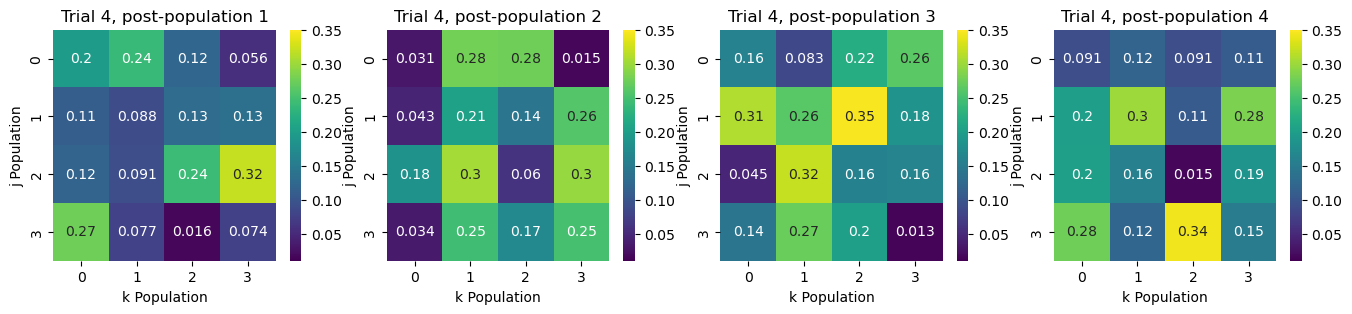

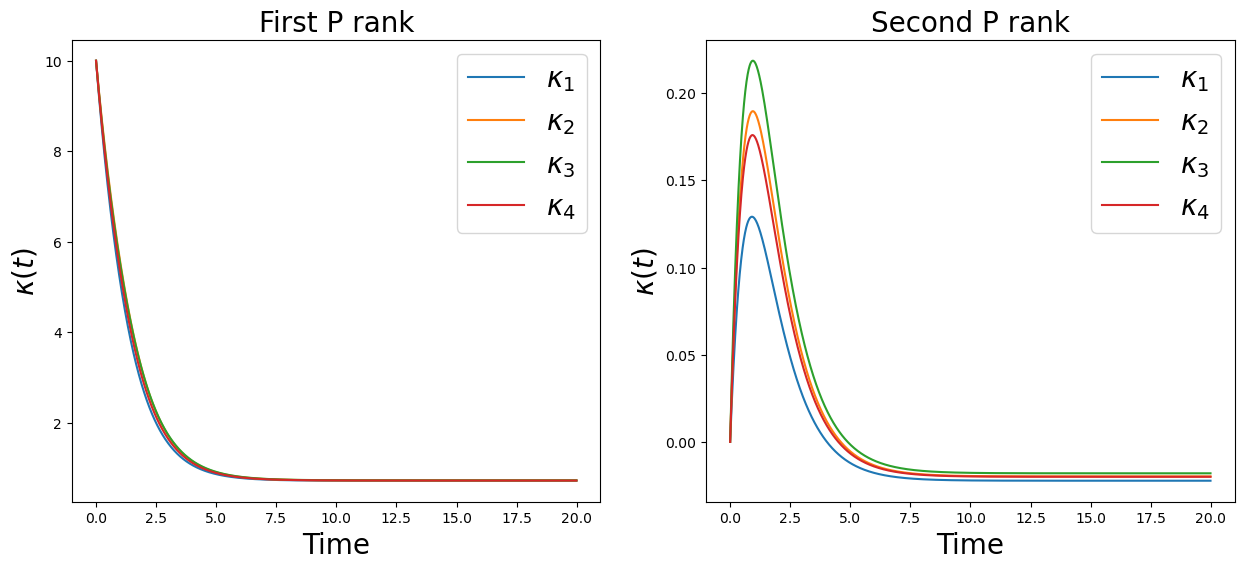

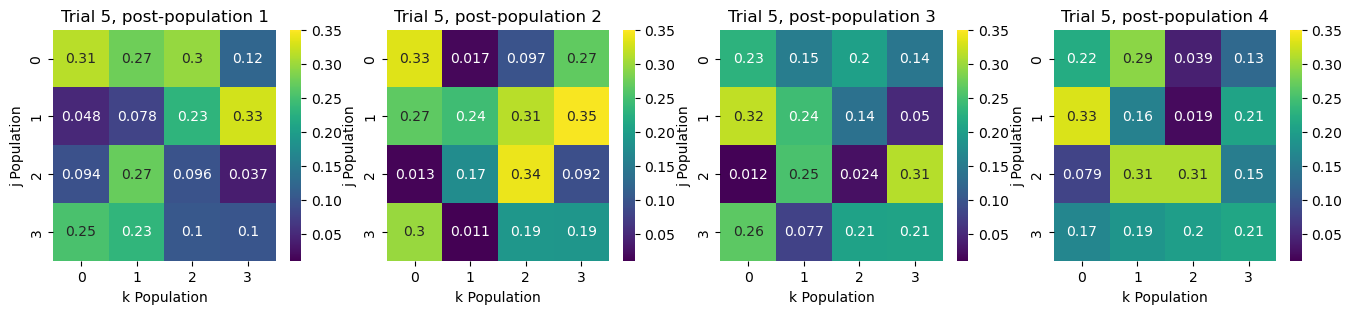

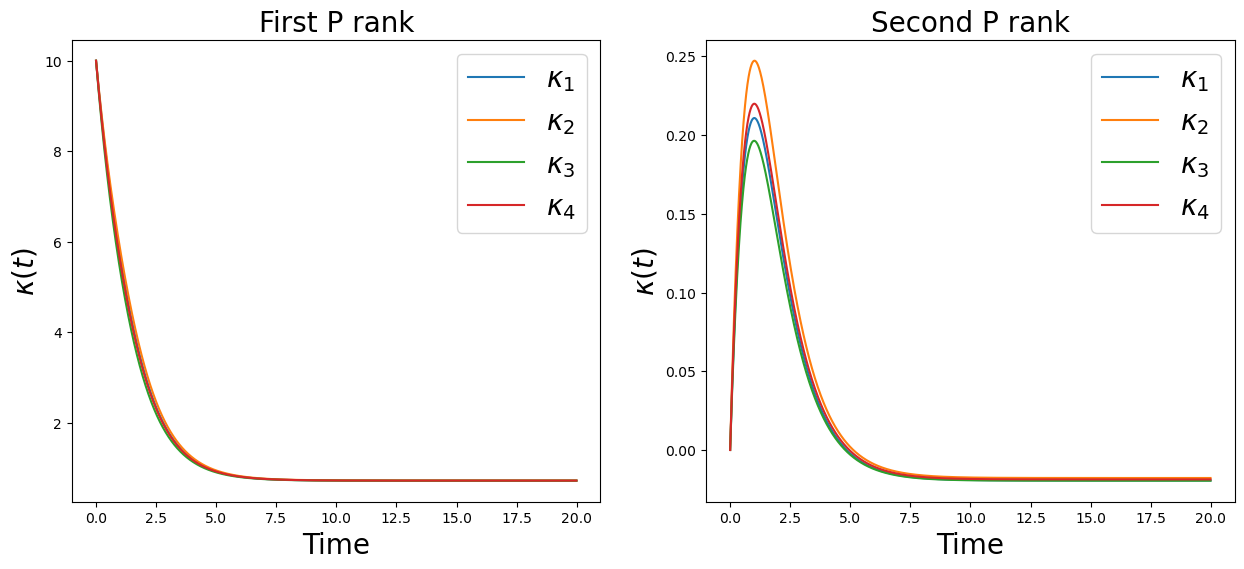

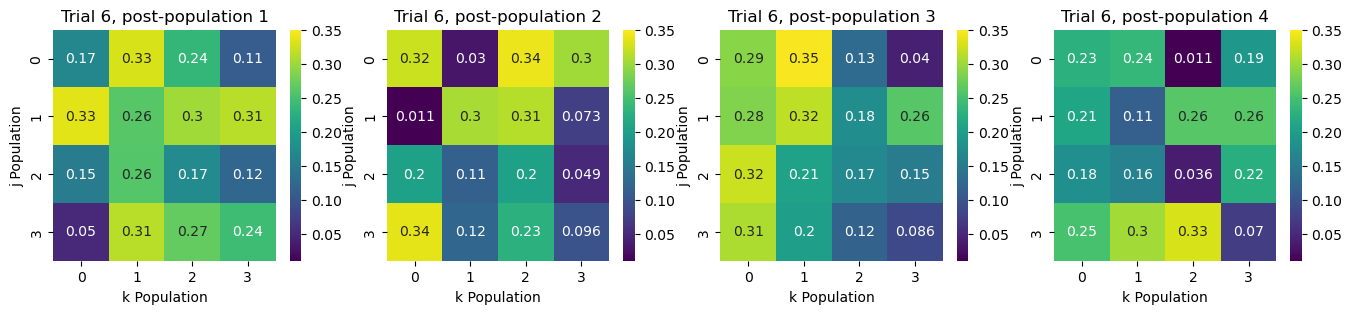

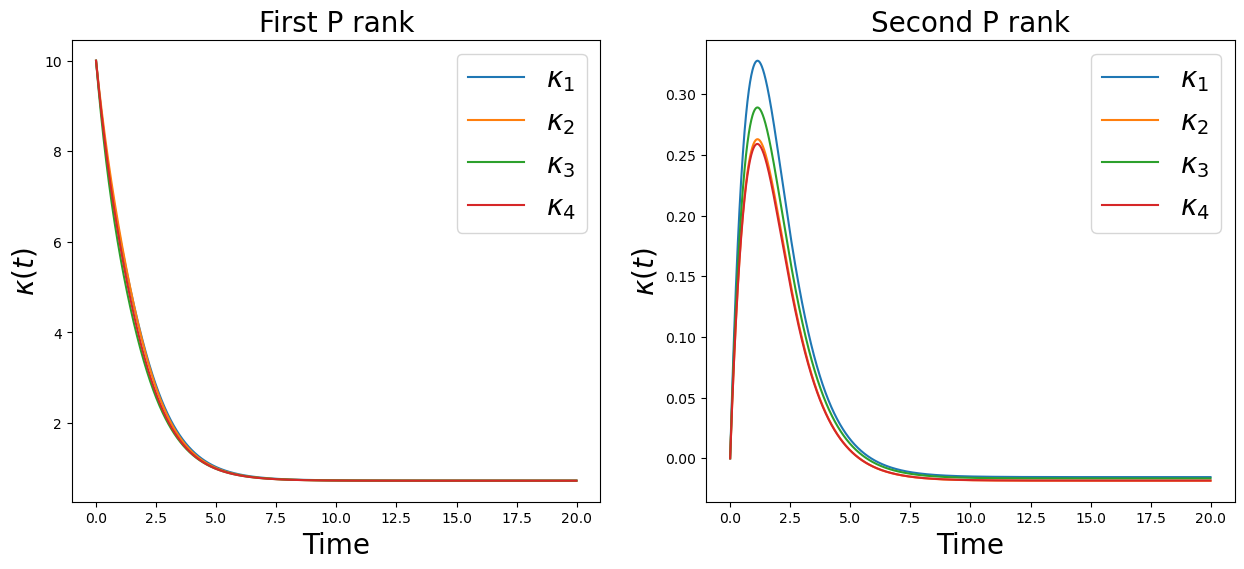

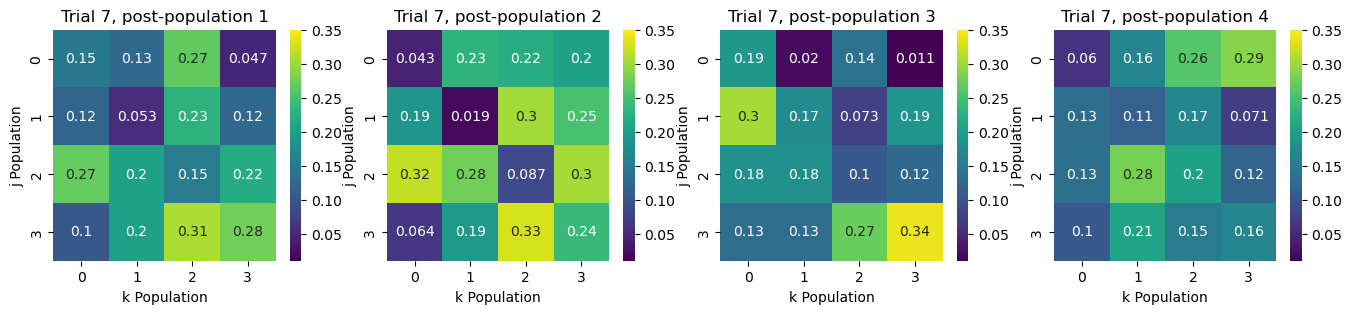

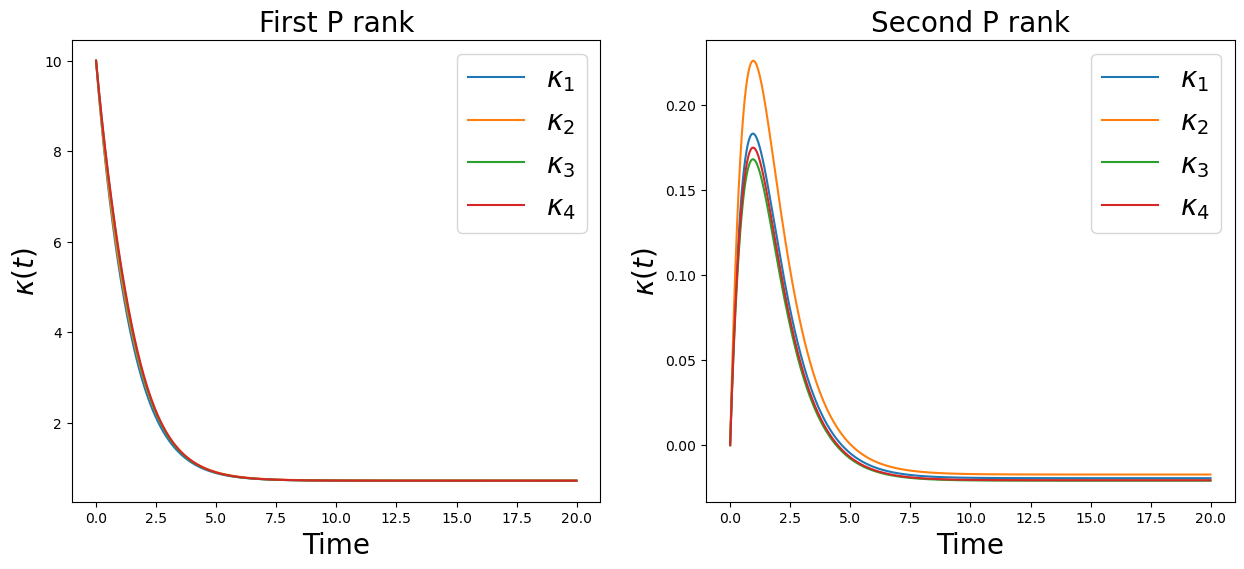

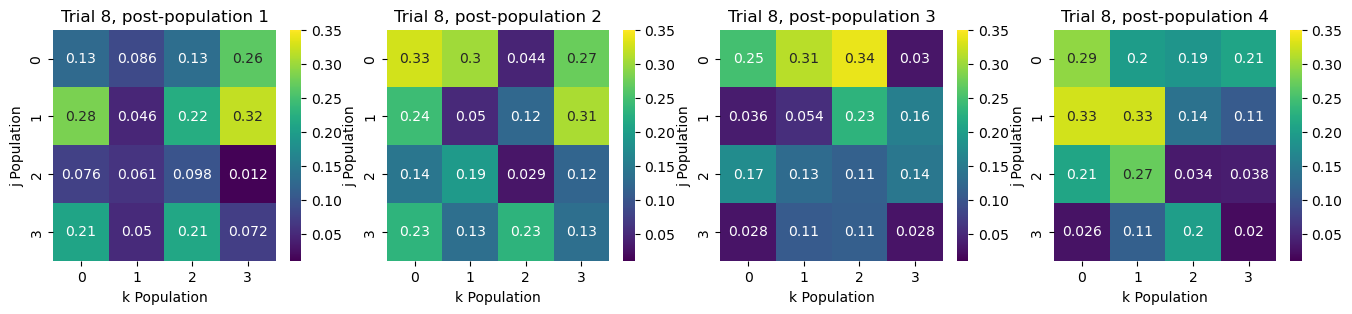

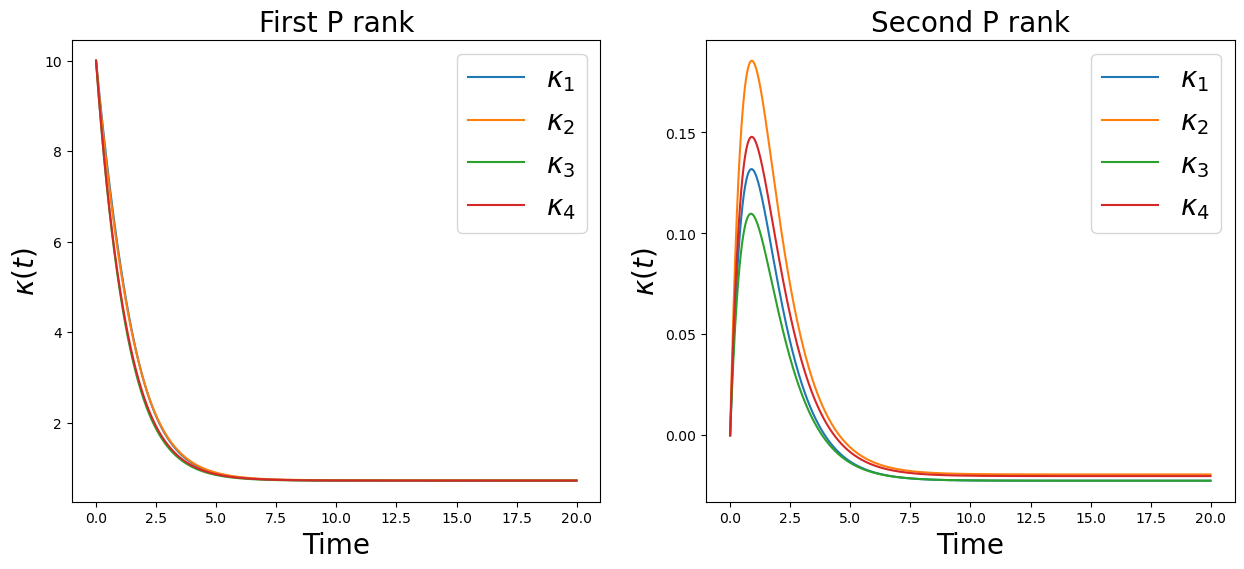

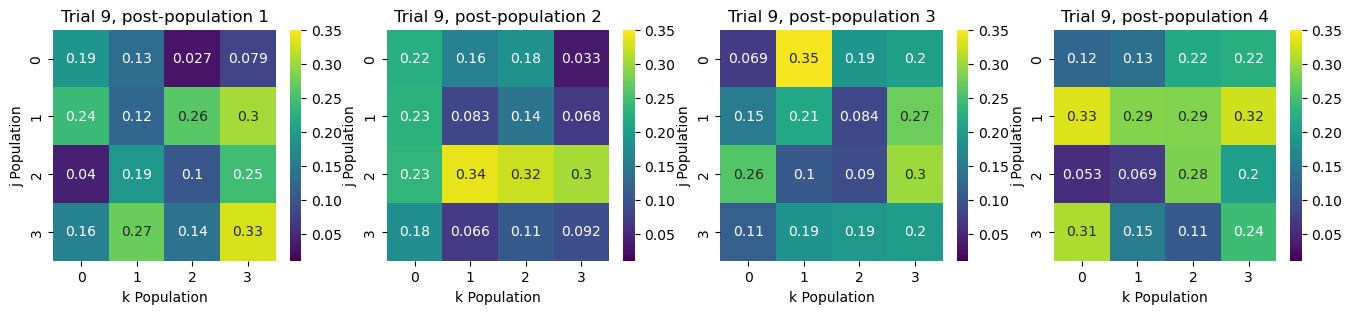

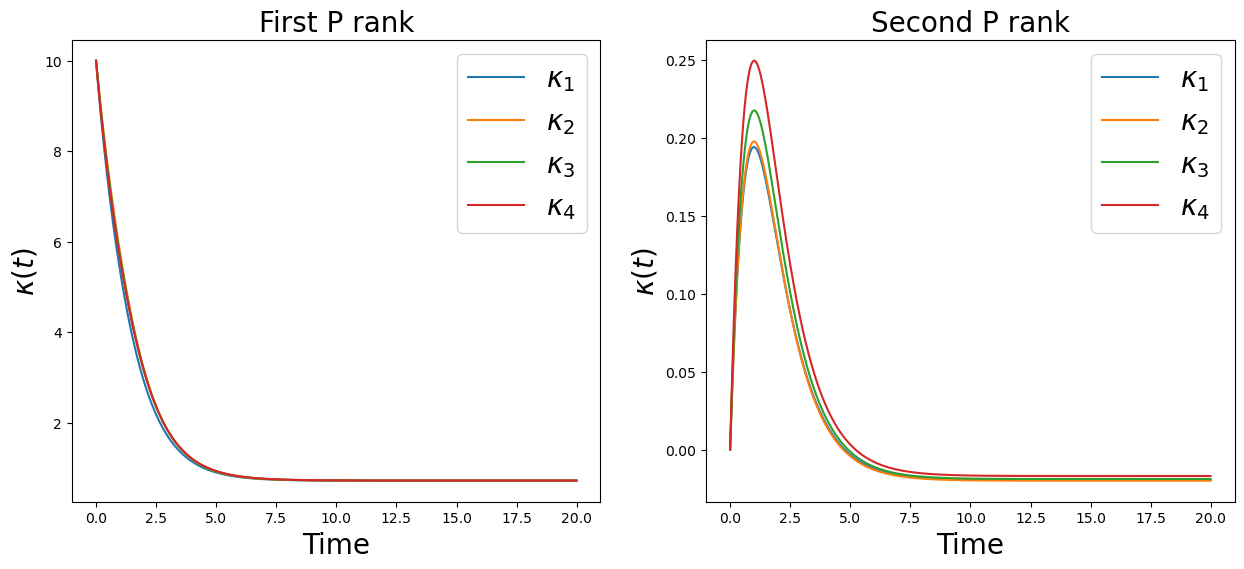

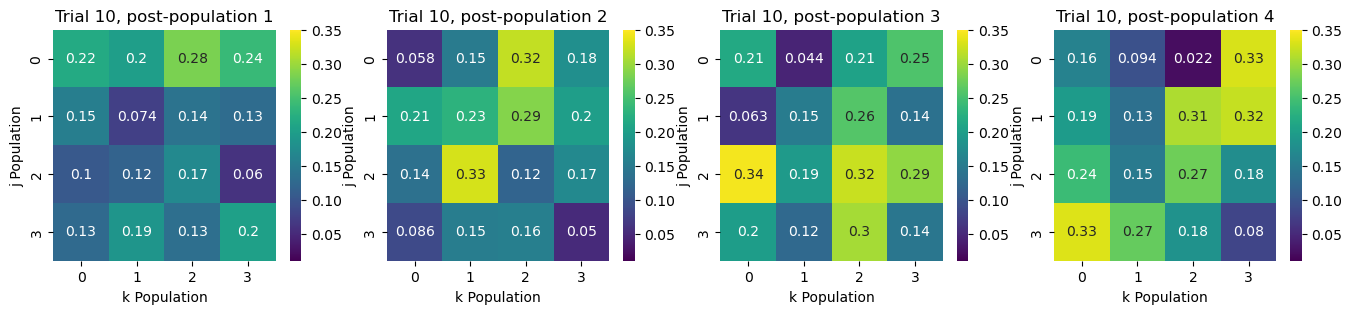

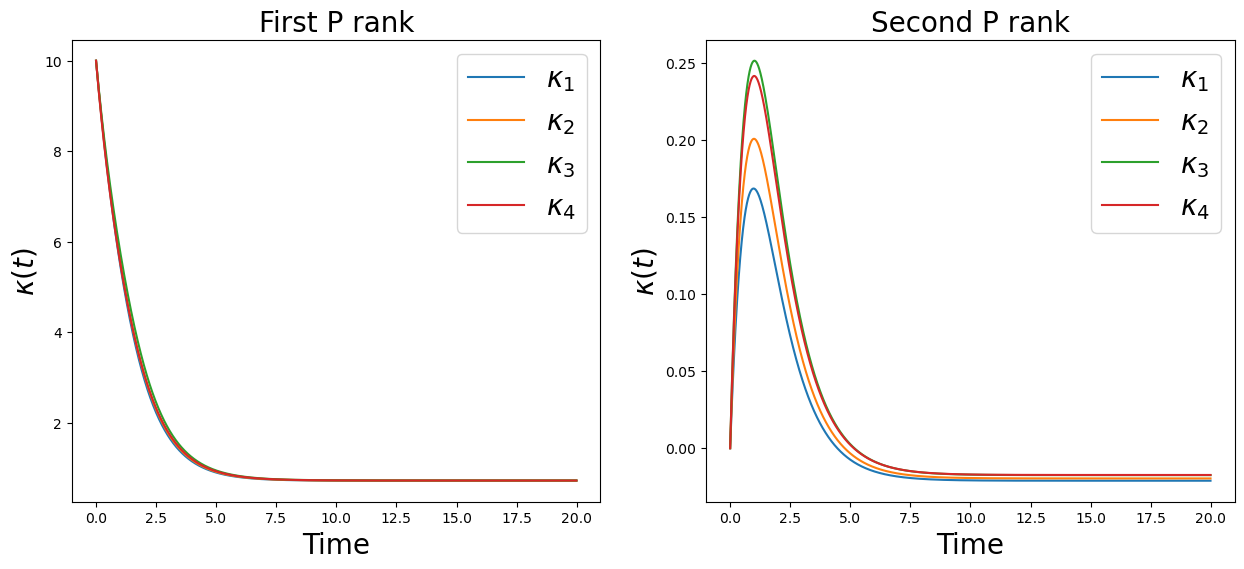

In [101]:
N_trials = 10

for k_trial in range(N_trials):
    
    plt.figure(figsize=(16.5, 3))
    TauChain = np.zeros((N_population, N_population, N_population))
    TauChain += np.random.uniform(0.01, 0.35, (N_population, N_population, N_population))
    if(k_trial==0):
        TauChain = np.zeros((N_population, N_population, N_population))
    for i in range(N_population):
        plt.subplot(1, N_population, i+1)
        sns.heatmap(TauChain[i, :, :], annot=True, cmap='viridis', vmin=0.01, vmax=0.35)
        plt.title(f'Trial {k_trial+1}, post-population {i+1}')
        plt.xlabel('k Population')
        plt.ylabel('j Population')
    plt.show()
        
    SigmaU2 = np.zeros((N_population, N_population))     # population, rank
    for x in range(N_population):
        for k in range(N_population):
            for y in range(N_population):
                SigmaU2[x, k] += (sigma**2/N_neuron) * np.abs(TauChain[y, x, k])
                
    k_res = np.zeros((2*N_population, N_time))   # initial condition
    k_res[:N_population, 0] = 10.0    # Initial condition

    for i_t in range(N_time-1):
    
        for r_uv in range(N_population):    # varianve variables
            delta_p_ruv = np.dot(SigmaU2[r_uv, :], k_res[:N_population, i_t]**2)
            k_res[r_uv, i_t+1] = k_res[r_uv, i_t] + (dt/time_scale) * (- k_res[r_uv, i_t] + N_neuron_arr[r_uv] * Phi(k_res[r_uv+N_population, i_t], delta_p_ruv, bias, thres) )
        
        for r_mn in range(N_population):    # mean variables
            delta_p_rmn = np.dot(SigmaU2[r_mn, :], k_res[:N_population, i_t]**2)
            recurrent_term = 0
            for x in range(N_population):
                recurrent_term += N_neuron_arr[x] * ((sigma**2/N_neuron)*np.dot(TauChain[r_mn, x, :], k_res[:N_population, i_t]) * derPhi(k_res[x+N_population, i_t], delta_p_rmn, thres) + j0_mat[r_mn,x] * Phi(k_res[x+N_population, i_t], delta_p_rmn, bias, thres))
            k_res[r_mn+N_population, i_t+1] = k_res[r_mn+N_population, i_t] + (dt/time_scale) * (- k_res[r_mn+N_population, i_t] + recurrent_term)

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('First P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.subplot(1, 2, 2)
    for i in range(N_population):
        plt.plot(np.arange(N_time)*dt, k_res[N_population + i, :], label=f'$\\kappa_{i+1}$')
    plt.legend(fontsize=20)
    plt.title('Second P rank', fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('$\\kappa(t)$', fontsize=20)
    plt.show()
